In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Read Data
pd.set_option('display.max_columns',500)
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Investigating and Analysing Missing Values
print(round(df.isnull().sum(axis=0)/len(df),6)*100)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_TYPE_SUITE                0.4201
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
DAYS_REGISTRATION              0.0000
DAYS_ID_PUBLISH                0.0000
OWN_CAR_AGE                   65.9908
FLAG_MOBIL                     0.0000
FLAG_EMP_PHONE                 0.0000
FLAG_WORK_PHONE                0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE  

In [4]:
df=df.loc[:,df.isna().sum(axis=0)/len(df)<0.40]
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.00

In [5]:
#Removing irrelevant columns
df=df.loc[:,:'EXT_SOURCE_2']
df=df.drop(['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
         'FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_PHONE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1)

In [6]:
print(round(df.isnull().sum(axis=0)/len(df),6)*100)

SK_ID_CURR                      0.0000
TARGET                          0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3455
CNT_FAM_MEMBERS                 0.0007
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
EXT_SOURCE_2             

In [7]:
df.shape

(307511, 26)

In [8]:
#checking the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH             

In [9]:
#finding the outlier in the dataset
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [10]:
df=df.drop(df[df['DAYS_EMPLOYED']==365243].index)
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government,0.555912
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion,0.322738
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,Other,0.354225
6,100009,0,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,2,2,Business Entity Type 3,0.724000
7,100010,0,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,3,3,Other,0.714279
9,100012,0,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,Electricity,0.746644
10,100014,0,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,3.0,2,2,Medicine,0.651862


In [11]:
#finding outlier in CODE_GENDER
df['CODE_GENDER'].value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

In [12]:
df=df.drop(df[df['CODE_GENDER']=='XNA'].index)

In [13]:
df['AMT_CREDIT'].describe()

count    2.521330e+05
mean     6.114018e+05
std      4.065294e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [14]:
#Binning the AMT_CREDIT According to the Quartile and removing the outlier
l1= list(df['AMT_CREDIT'].quantile([0.25,0.5,0.75,0.99]).astype(int))
def Cat(x):
    if (x<=l1[0]):
        return 'Low'
    elif (x>l1[0]) & (x<=l1[1]):
        return 'Medium'
    elif (x>l1[1]) & (x<=l1[2]):
        return 'High'
    elif (x>l1[2]) & (x<=l1[3]):
        return 'Very_High'
    else:
        return 'Outlier'
df['Crd_Cat_Req'] = df['AMT_CREDIT'].apply(lambda x: Cat(x))

In [15]:
outlier_crd=df[df['Crd_Cat_Req']=='Outlier']
outlier_crd

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req
189,100219,0,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514,-64.0,-2793,Core staff,3.0,1,1,Business Entity Type 3,0.693358,Outlier
337,100389,0,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,-14216,-365,-3183.0,-4423,Core staff,2.0,2,2,Self-employed,0.748204,Outlier
341,100393,0,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,-14966,-6158,-954.0,-4979,Core staff,4.0,2,2,Police,0.682320,Outlier
441,100508,0,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,-18268,-2569,-4292.0,-1699,Managers,2.0,1,1,Trade: type 3,0.774368,Outlier
485,100559,0,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994,-5893.0,-4106,Core staff,2.0,2,2,Security Ministries,0.503266,Outlier
639,100730,0,F,N,Y,1,315000.0,1971072.0,62019.0,1800000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-16938,-1744,-3240.0,-496,Accountants,3.0,1,1,Business Entity Type 1,0.783543,Outlier
667,100771,0,M,N,Y,1,288000.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020246,-17087,-5171,-1166.0,-518,Managers,3.0,3,3,Industry: type 9,0.419168,Outlier
748,100861,0,M,N,N,0,306000.0,2085120.0,72477.0,1800000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-14206,-5632,-185.0,-4669,Private service staff,2.0,2,2,Other,0.636162,Outlier
871,100999,0,M,Y,N,0,450000.0,2125953.0,81108.0,1984500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,With parents,0.072508,-10121,-1354,-1393.0,-2672,High skill tech staff,1.0,1,1,Business Entity Type 1,0.683097,Outlier
1243,101468,0,M,Y,N,1,247891.5,2254500.0,65988.0,2254500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.031329,-11361,-1252,-5403.0,-3572,Sales staff,3.0,2,2,Trade: type 7,0.540325,Outlier


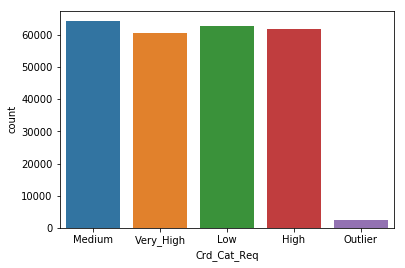

In [16]:
sns.countplot(x='Crd_Cat_Req',data=df)

In [17]:
#Binning the AMT_INCOME_TOTAL According to the Quartile and finding the outlier 
l1= list(df['AMT_INCOME_TOTAL'].quantile([0.25,0.5,0.75,0.995]).astype(int))
print(l1)

[112500, 157500, 211500, 675000]


In [18]:
df['Income_cat'] = df['AMT_INCOME_TOTAL'].apply(lambda x: Cat(x))

In [19]:
Outlier_Incm=df[df['Income_cat']=='Outlier']
Outlier_Incm

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat
319,100366,0,M,Y,Y,0,765000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.002506,-11788,-3144,-5643.0,-3962,Managers,1.0,2,2,Business Entity Type 3,0.765981,Very_High,Outlier
1238,101461,0,M,Y,Y,0,810000.0,661500.0,37066.5,661500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.072508,-21766,-5065,-11148.0,-1374,Drivers,2.0,1,1,Business Entity Type 3,0.629307,High,Outlier
1504,101769,0,M,Y,Y,0,1080000.0,180000.0,9000.0,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-13633,-5536,-3.0,-4971,NaN,2.0,1,1,Business Entity Type 3,0.652924,Low,Outlier
1586,101857,0,F,N,Y,0,720000.0,1125000.0,44617.5,1125000.0,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,0.046220,-21630,-1059,-13.0,-1726,NaN,1.0,1,1,Other,0.687675,Very_High,Outlier
1644,101929,1,F,Y,Y,0,697500.0,450000.0,22500.0,450000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-23299,-2550,-2591.0,-103,Medicine staff,2.0,1,1,Medicine,0.696737,Medium,Outlier
2009,102356,0,M,Y,Y,1,765000.0,1350000.0,51552.0,1350000.0,Unaccompanied,Working,Incomplete higher,Separated,House / apartment,0.010643,-10186,-3012,-4912.0,-2857,NaN,2.0,2,2,Business Entity Type 3,0.655970,Very_High,Outlier
2378,102782,0,F,N,Y,0,693000.0,835380.0,40320.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-10076,-1773,-4874.0,-2557,NaN,2.0,1,1,Business Entity Type 3,0.550118,Very_High,Outlier
3209,103747,0,F,Y,Y,0,810000.0,900000.0,94509.0,900000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.046220,-17420,-4215,-2907.0,-969,Sales staff,2.0,1,1,Self-employed,0.618368,Very_High,Outlier
3287,103838,0,M,Y,Y,0,810000.0,630000.0,59035.5,630000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.046220,-10712,-1498,-4857.0,-3379,NaN,1.0,1,1,Business Entity Type 3,0.731254,High,Outlier
3371,103938,0,F,N,N,1,1350000.0,2410380.0,109053.0,2250000.0,NaN,Commercial associate,Higher education,Married,House / apartment,0.072508,-12213,-843,-757.0,-4132,Managers,3.0,1,1,Housing,0.724541,Outlier,Outlier


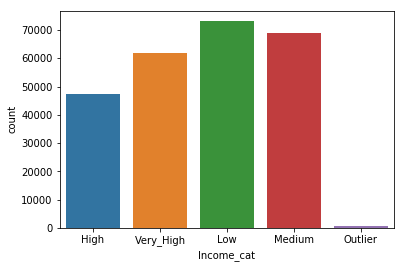

In [20]:
sns.countplot(x='Income_cat',data=df)

In [21]:
#Binning the AMT_ANUITY According to the Quartile and finding the outlier 
l1= list(df['AMT_ANNUITY'].quantile([0.25,0.5,0.75,0.99]).astype(int))
def Cat(x):
    if (x<=l1[0]):
        return 'Low'
    elif (x>l1[0]) & (x<=l1[1]):
        return 'Medium'
    elif (x>l1[1]) & (x<=l1[2]):
        return 'High'
    elif (x>l1[2]) & (x<=l1[3]):
        return 'Very_High'
    else:
        return 'Outlier'
df['Cat_ANNUITY'] = df['AMT_ANNUITY'].apply(lambda x: Cat(x))

In [22]:
Outlier_Annu=df[df['Cat_ANNUITY']=='Outlier']
Outlier_Annu

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat,Cat_ANNUITY
60,100071,0,F,N,Y,0,180000.0,1663987.5,86989.5,1588500.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018801,-20121,-2446,-6755.0,-2177,Accountants,2.0,2,2,Industry: type 11,0.570666,Very_High,High,Outlier
112,100132,0,F,N,Y,0,202500.0,1136439.0,73611.0,1089000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.032561,-23656,-968,-14666.0,-4456,Cleaning staff,1.0,1,1,Business Entity Type 2,0.711289,Very_High,High,Outlier
189,100219,0,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514,-64.0,-2793,Core staff,3.0,1,1,Business Entity Type 3,0.693358,Outlier,Very_High,Outlier
191,100221,0,F,N,Y,0,225000.0,684054.0,77494.5,630000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.006629,-23656,-11883,-7125.0,-4681,NaN,1.0,2,2,Bank,0.592459,High,Very_High,Outlier
485,100559,0,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994,-5893.0,-4106,Core staff,2.0,2,2,Security Ministries,0.503266,Outlier,Very_High,Outlier
525,100605,0,F,Y,Y,1,229500.0,1006920.0,72778.5,900000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.008230,-9920,-279,-4568.0,-1344,Laborers,3.0,2,2,Industry: type 12,0.655496,Very_High,Very_High,Outlier
546,100632,0,M,Y,Y,0,225000.0,732915.0,79065.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-16195,-1067,-3466.0,-3465,Managers,2.0,1,1,Business Entity Type 3,0.748822,High,Very_High,Outlier
748,100861,0,M,N,N,0,306000.0,2085120.0,72477.0,1800000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-14206,-5632,-185.0,-4669,Private service staff,2.0,2,2,Other,0.636162,Outlier,Very_High,Outlier
871,100999,0,M,Y,N,0,450000.0,2125953.0,81108.0,1984500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,With parents,0.072508,-10121,-1354,-1393.0,-2672,High skill tech staff,1.0,1,1,Business Entity Type 1,0.683097,Outlier,Very_High,Outlier
875,101004,0,F,Y,Y,1,112500.0,1215000.0,84694.5,1215000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005144,-15044,-197,-4570.0,-4835,Laborers,3.0,2,2,Postal,0.301154,Very_High,Low,Outlier


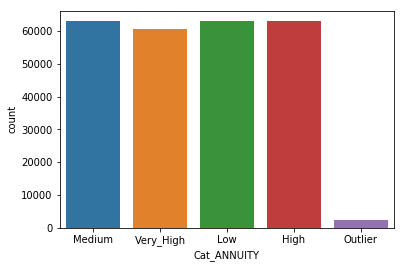

In [23]:
sns.countplot(x='Cat_ANNUITY',data=df)

In [24]:
#Data Imbalance in the Target variable 
df['TARGET'].value_counts()

0    230298
1     21835
Name: TARGET, dtype: int64

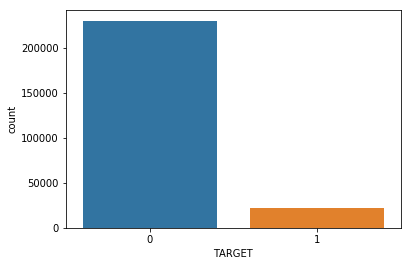

In [25]:
#plotting the Data imbalance in the Target variable 
sns.countplot(x='TARGET',data=df)

In [26]:
# Segementing the value og Taget variable
Tg_0=df[df['TARGET']==0]
Tg_1=df[df['TARGET']==1]

In [27]:
# Imbalance Percentage
print((len(Tg_0)-len(Tg_1))/len(Tg_0)*100)

90.51880606865886


In [28]:
Tg_0

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat,Cat_ANNUITY
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246,Very_High,Very_High,Very_High
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government,0.555912,Low,Low,Low
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion,0.322738,Medium,Medium,Medium
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,Other,0.354225,Medium,Low,High
6,100009,0,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,2,2,Business Entity Type 3,0.724000,Very_High,High,Very_High
7,100010,0,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,3,3,Other,0.714279,Very_High,Very_High,Very_High
9,100012,0,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,Electricity,0.746644,Medium,Medium,Medium
10,100014,0,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,3.0,2,2,Medicine,0.651862,High,Low,Medium
12,100016,0,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,-311.0,-3227,Laborers,2.0,2,2,Business Entity Type 2,0.715042,Low,Low,Low


<b>Univariate Analysis of Categorical variable<b>

In [29]:
#performing the univariate analysis on categorical variable on TG_0
def plot_ct(var,d):
    sns.countplot(x=var,data=d)

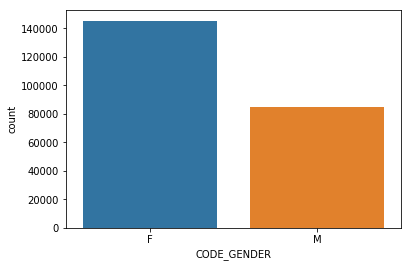

In [30]:
plot_ct('CODE_GENDER',Tg_0)

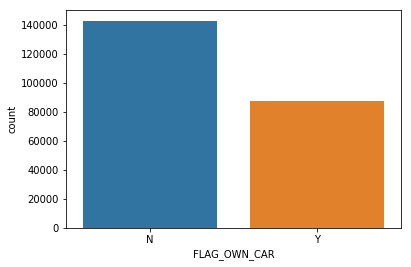

In [31]:
plot_ct('FLAG_OWN_CAR',Tg_0)

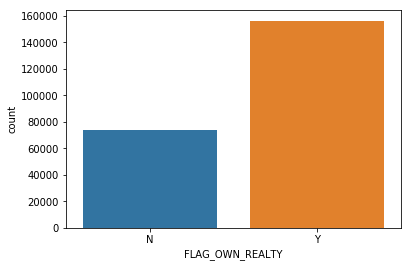

In [32]:
plot_ct('FLAG_OWN_REALTY',Tg_0)

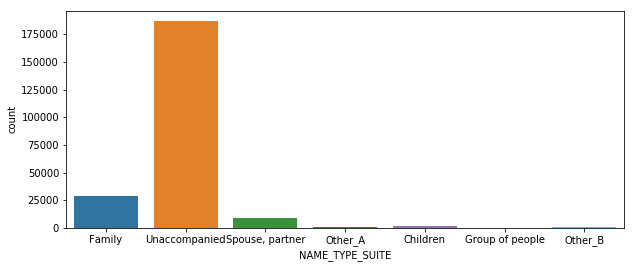

In [33]:
plt.figure(figsize=(10,4))
plot_ct('NAME_TYPE_SUITE',Tg_0)

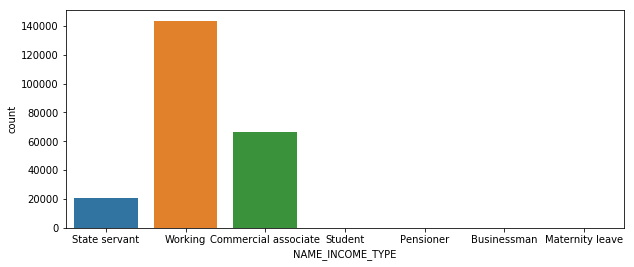

In [34]:
plt.figure(figsize=(10,4))
plot_ct('NAME_INCOME_TYPE',Tg_0)

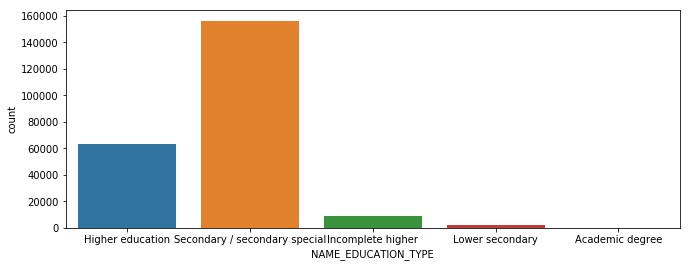

In [35]:
plt.figure(figsize=(11,4))
plot_ct('NAME_EDUCATION_TYPE',Tg_0)

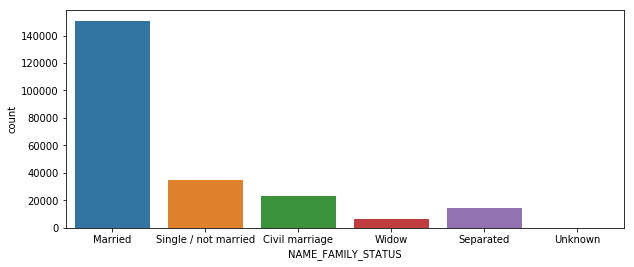

In [36]:
plt.figure(figsize=(10,4))
plot_ct('NAME_FAMILY_STATUS',Tg_0)

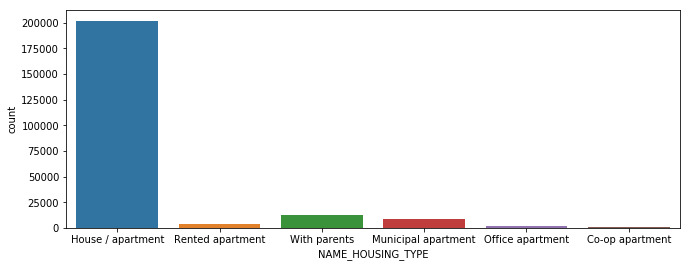

In [37]:
plt.figure(figsize=(11,4))
plot_ct('NAME_HOUSING_TYPE',Tg_0)

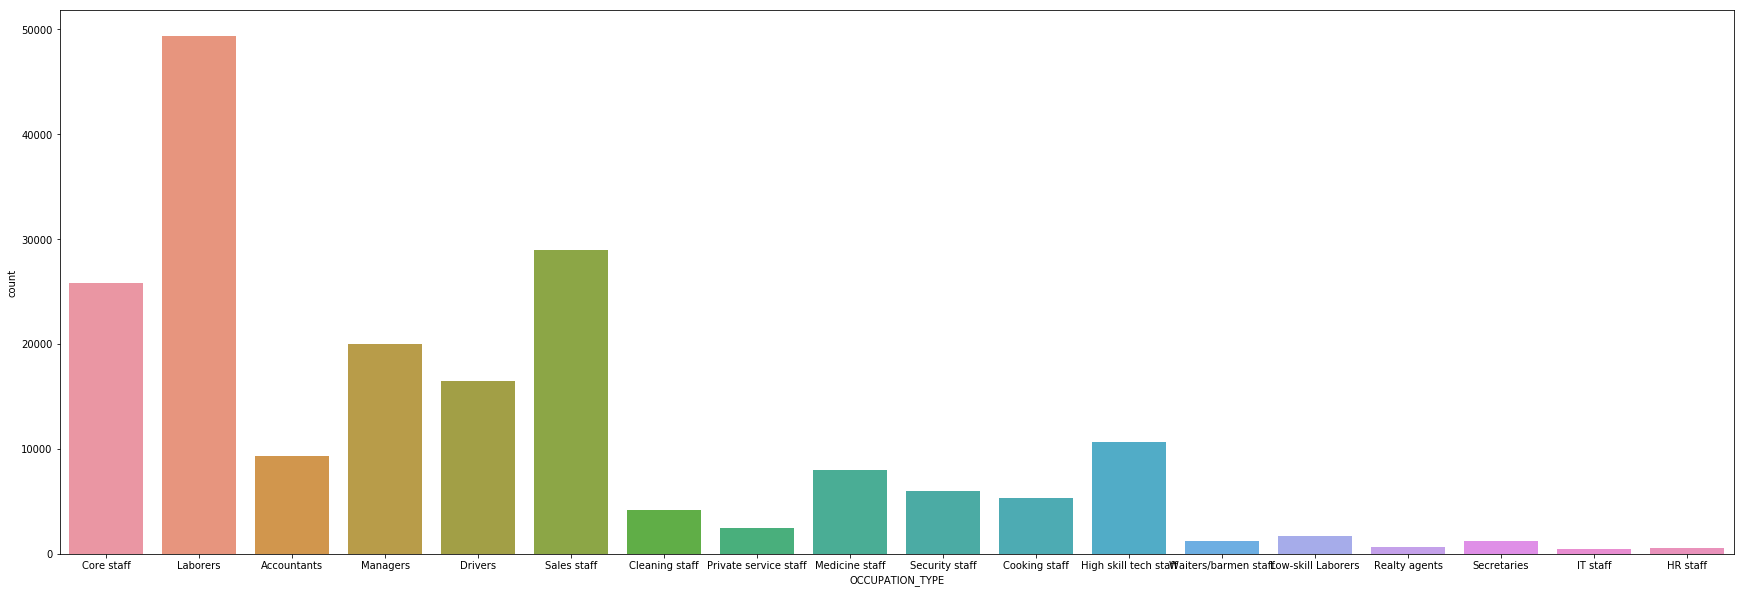

In [38]:
plt.figure(figsize=(30,10))
plot_ct('OCCUPATION_TYPE',Tg_0)

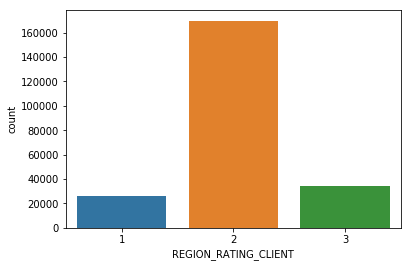

In [39]:
plot_ct('REGION_RATING_CLIENT',Tg_0)

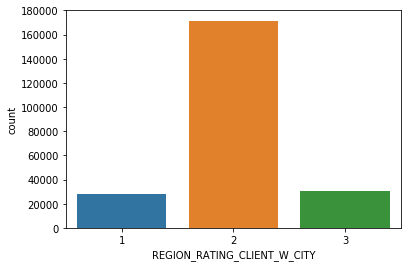

In [40]:
plot_ct('REGION_RATING_CLIENT_W_CITY',Tg_0)

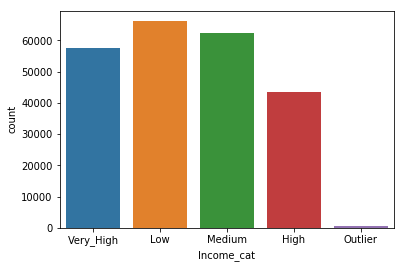

In [41]:
plot_ct('Income_cat',Tg_0)

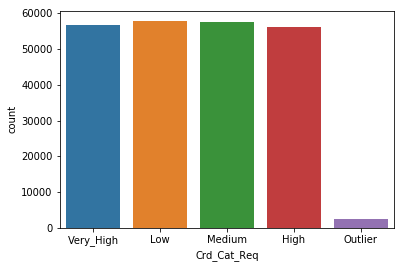

In [42]:
plot_ct('Crd_Cat_Req',Tg_0)

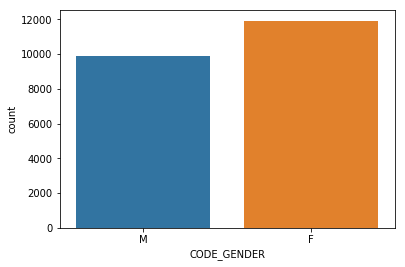

In [43]:
#performing the univariate analysis on categorical variable on Tg_1
plot_ct('CODE_GENDER',Tg_1)

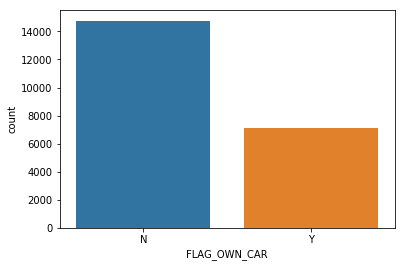

In [44]:
plot_ct('FLAG_OWN_CAR',Tg_1)

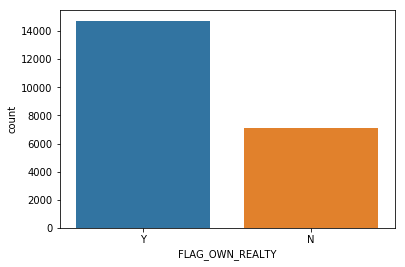

In [45]:
plot_ct('FLAG_OWN_REALTY',Tg_1)

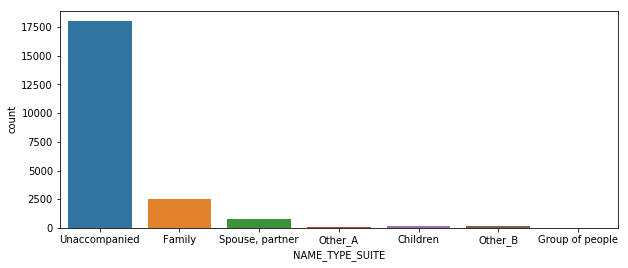

In [46]:
plt.figure(figsize=(10,4))
plot_ct('NAME_TYPE_SUITE',Tg_1)

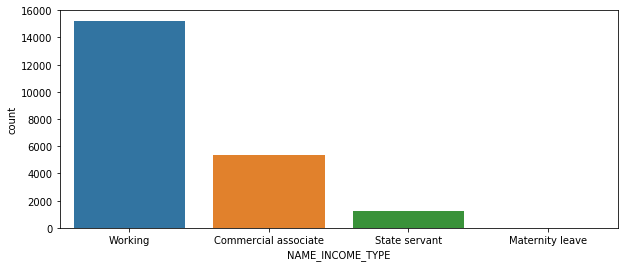

In [47]:
plt.figure(figsize=(10,4))
plot_ct('NAME_INCOME_TYPE',Tg_1)

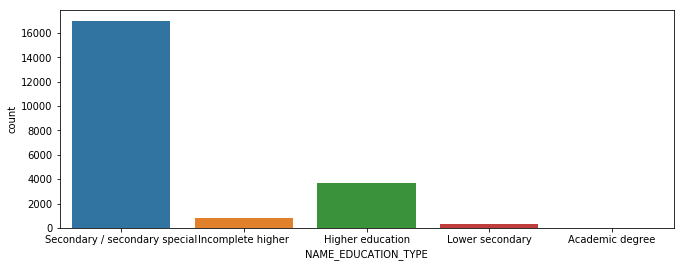

In [48]:
plt.figure(figsize=(11,4))
plot_ct('NAME_EDUCATION_TYPE',Tg_1)

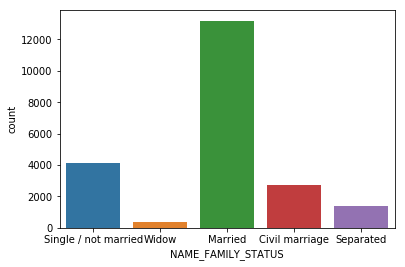

In [49]:
plot_ct('NAME_FAMILY_STATUS',Tg_1)

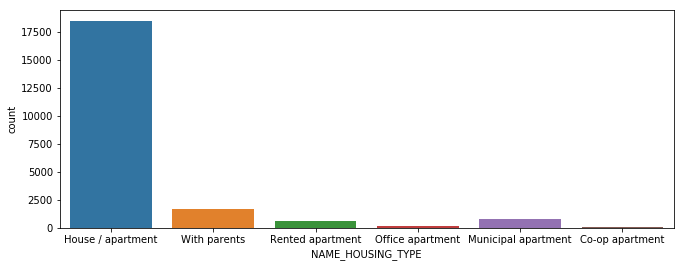

In [50]:
plt.figure(figsize=(11,4))
plot_ct('NAME_HOUSING_TYPE',Tg_1)

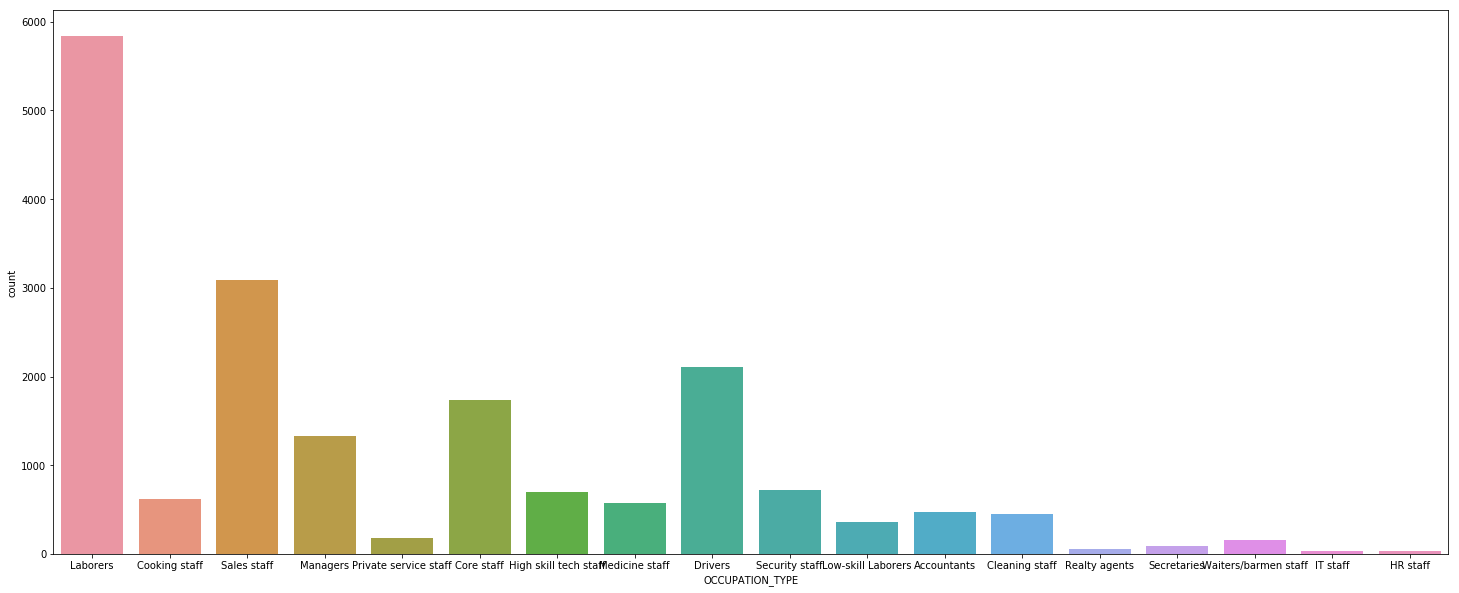

In [51]:
plt.figure(figsize=(25,10))
plot_ct('OCCUPATION_TYPE',Tg_1)

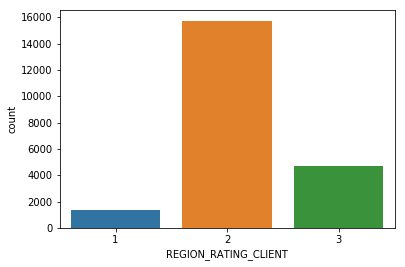

In [52]:
plot_ct('REGION_RATING_CLIENT',Tg_1)

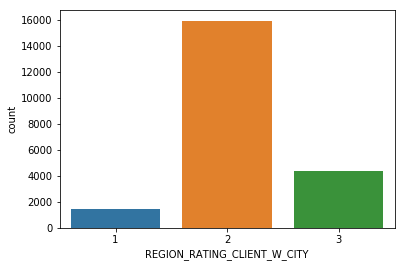

In [53]:
plot_ct('REGION_RATING_CLIENT_W_CITY',Tg_1)

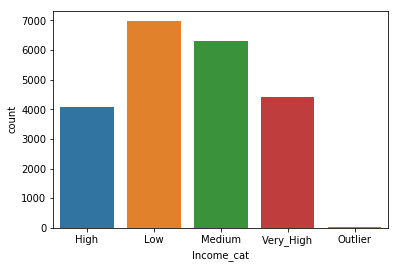

In [54]:
plot_ct('Income_cat',Tg_1)

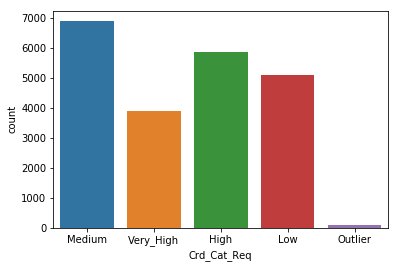

In [55]:
plot_ct('Crd_Cat_Req',Tg_1)

In [56]:
#selecting the numerical columns from tg_0 
df0_num=Tg_0.select_dtypes(include=['int','int16','int32','int64','float','float32','float64'])
df0_num=df0_num.drop('TARGET',axis=1)

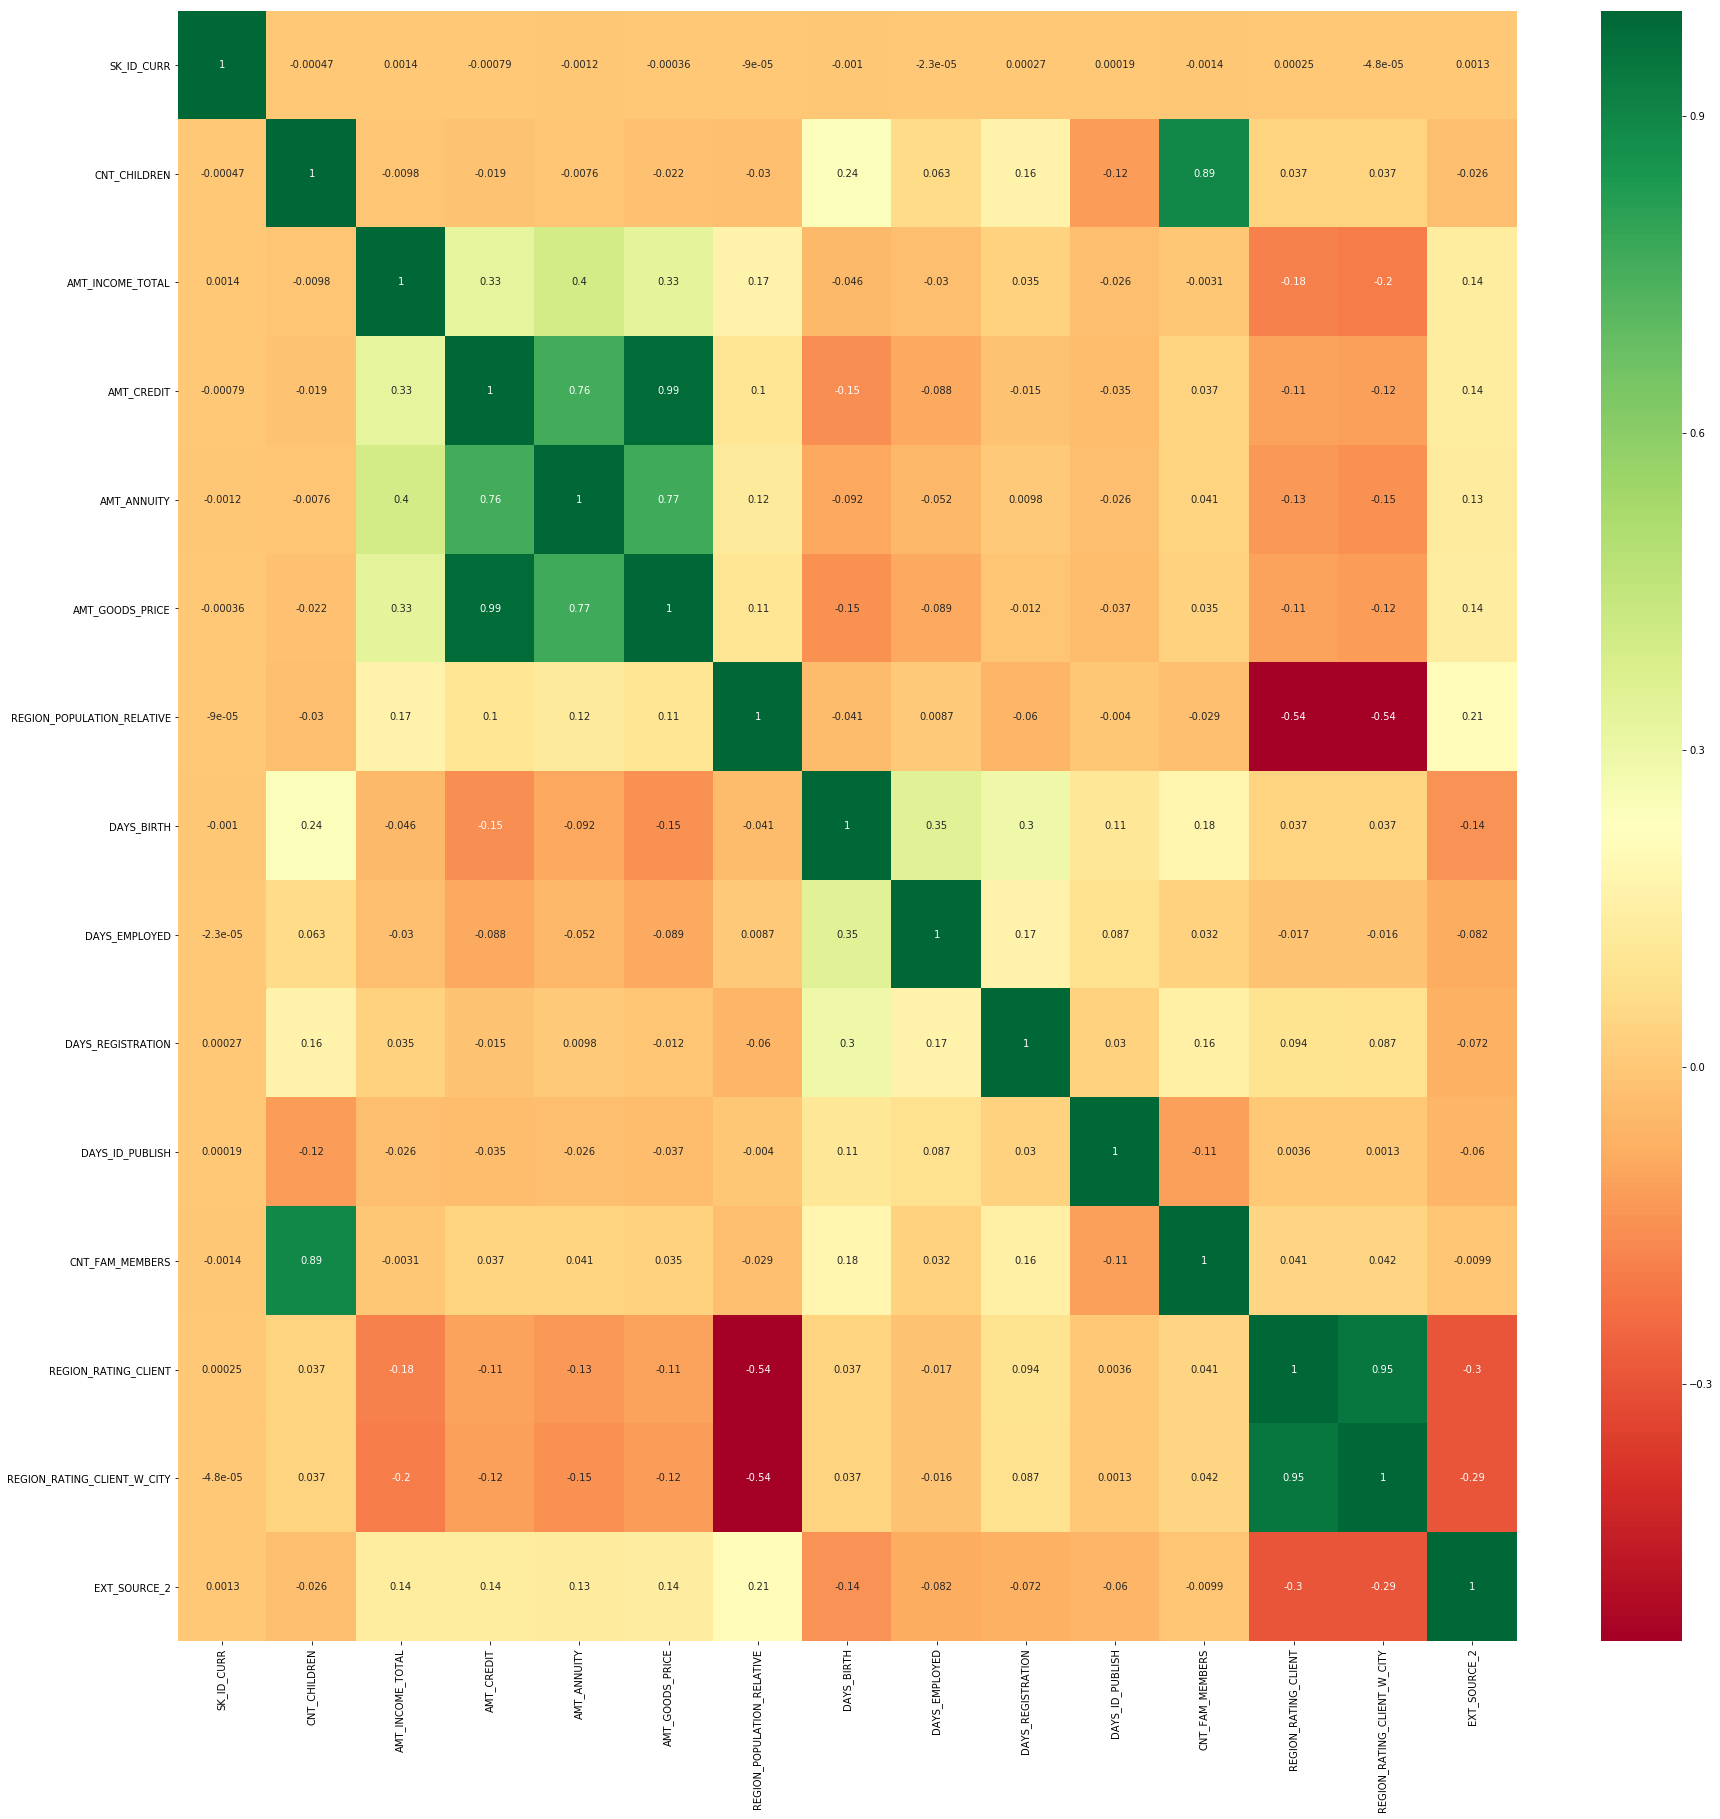

In [57]:
corrmat = df0_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df0_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
#selecting the numerical columns from tg_0 
df1_num=Tg_1.select_dtypes(include=['int','int16','int32','int64','float','float32','float64'])
df1_num=df1_num.drop('TARGET',axis=1)

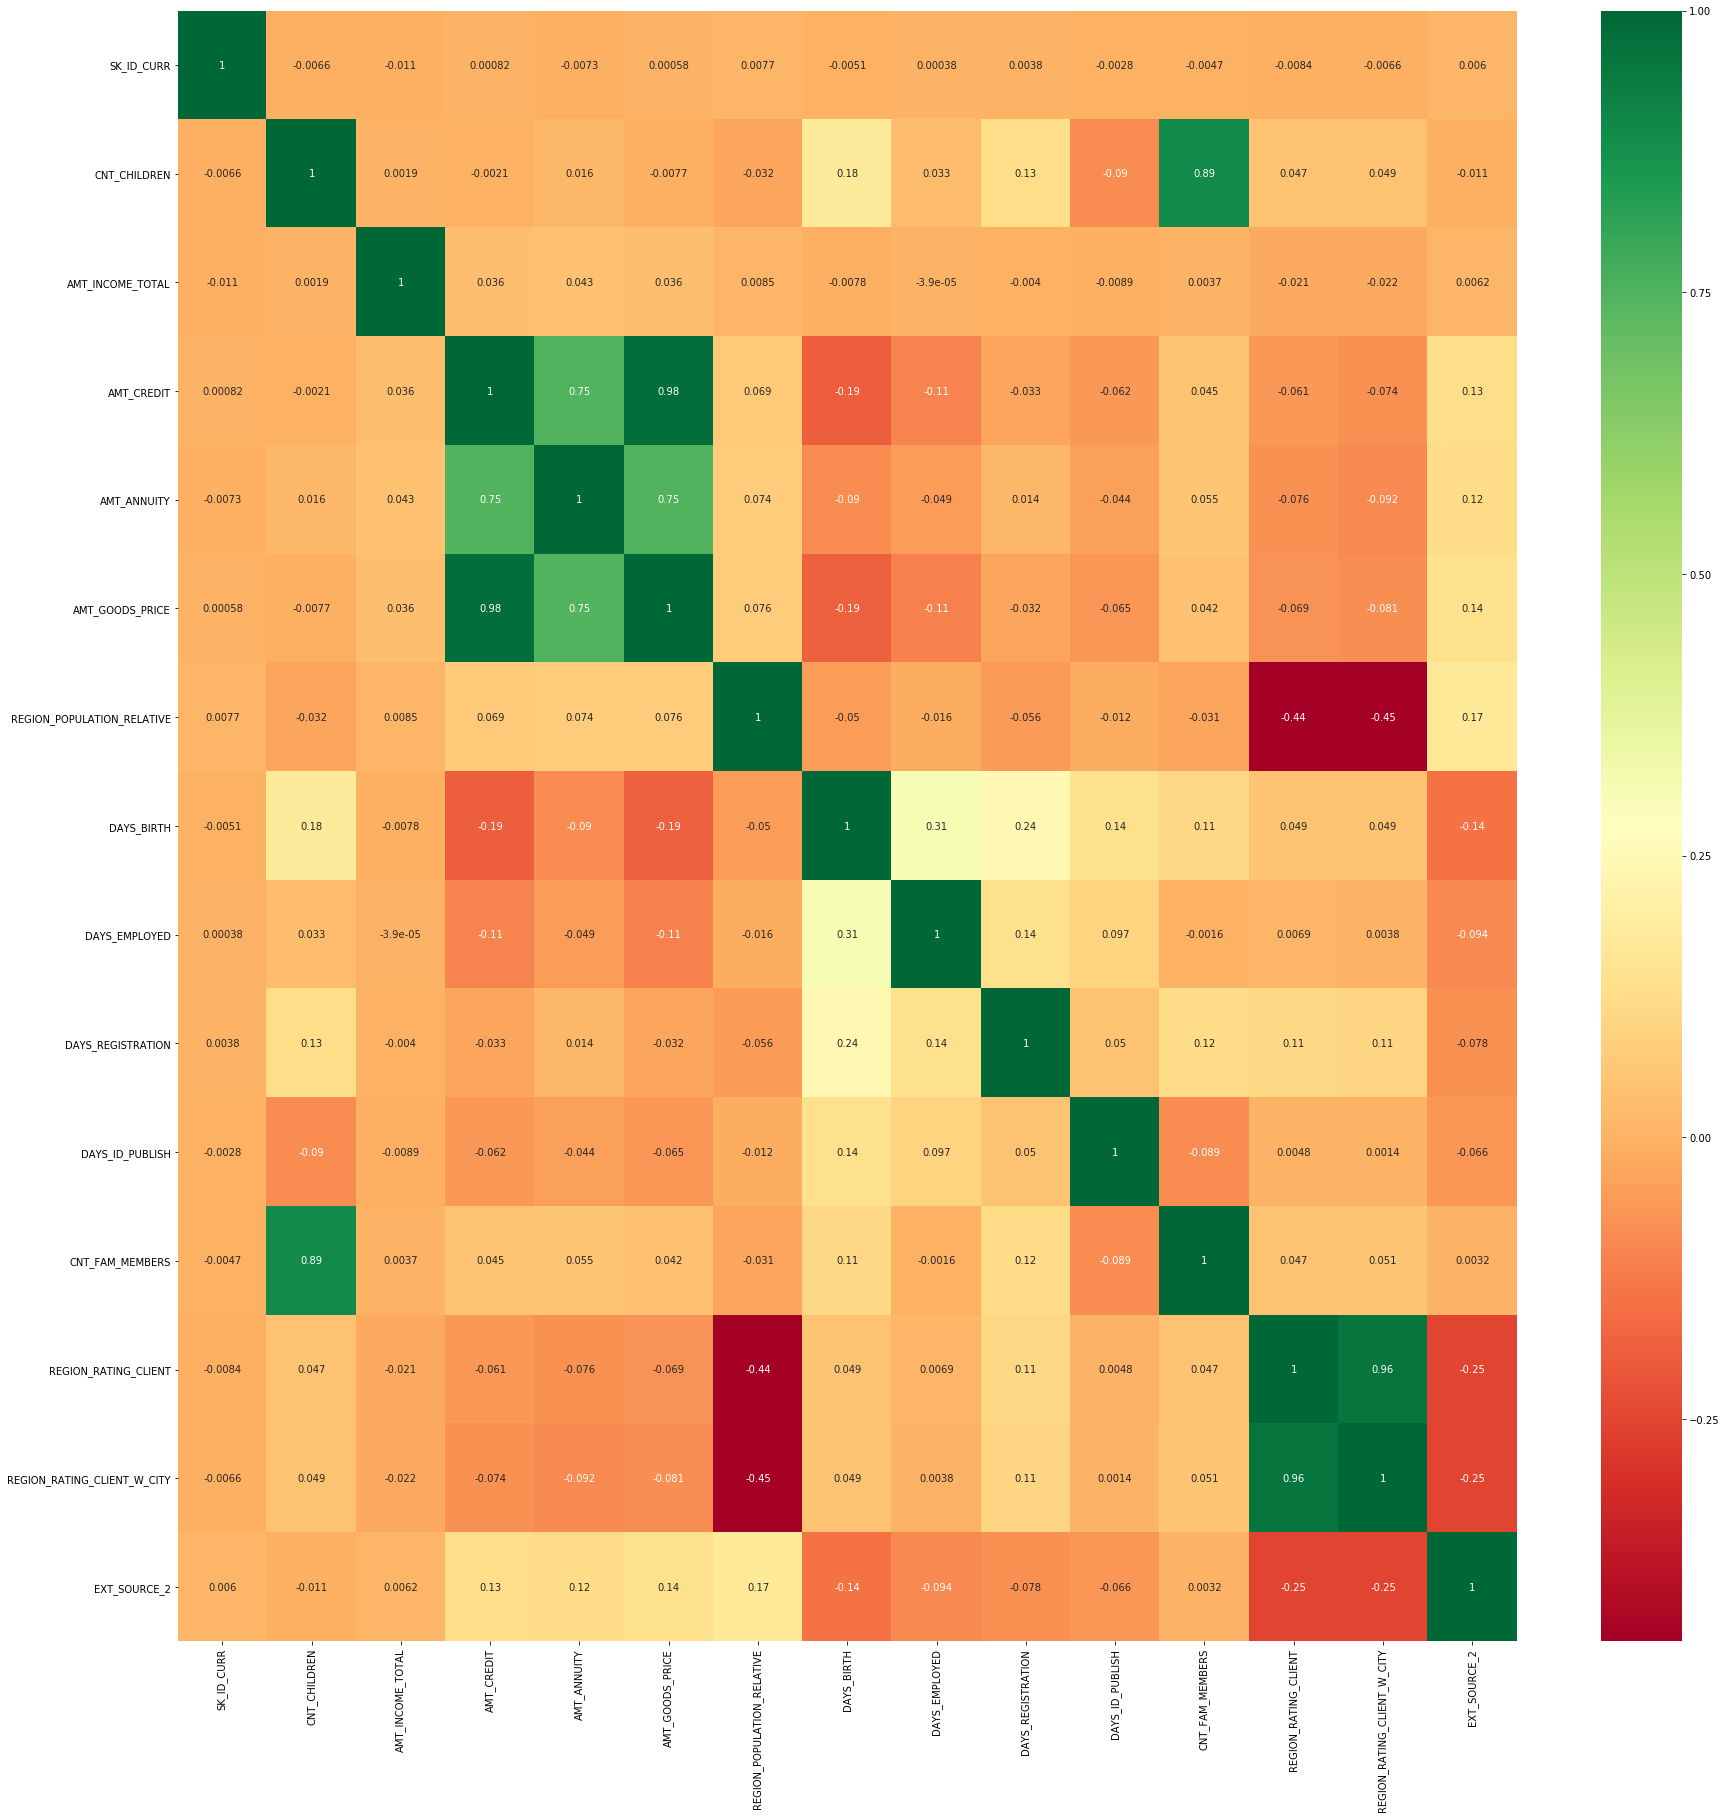

In [59]:
corrmat = df1_num.corr()
top_corr_features = corrmat.index
fig=plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df1_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig.savefig('corr.jpg')

<b> Univariate analysis of the numeical variable <b>

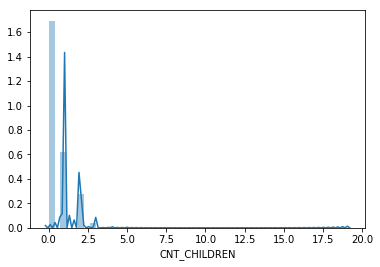

In [60]:
#univariate analysis of the CNT_CHIlDREN
sns.distplot(df0_num['CNT_CHILDREN'])

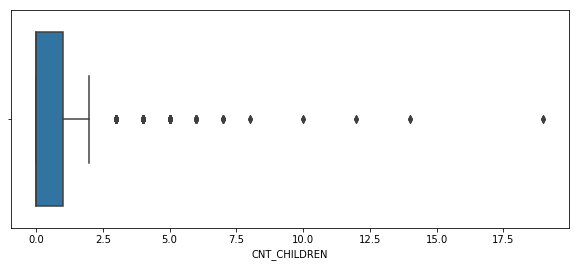

In [61]:
plt.figure(figsize=(10,4))
sns.boxplot('CNT_CHILDREN',data=df0_num)

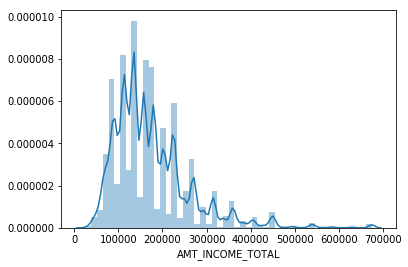

In [62]:
df_wo=Tg_0[Tg_0['Income_cat']!='Outlier']
sns.distplot(df_wo['AMT_INCOME_TOTAL'])

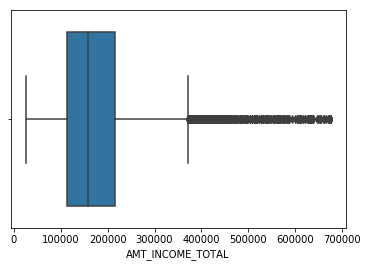

In [63]:
sns.boxplot('AMT_INCOME_TOTAL',data=df_wo)

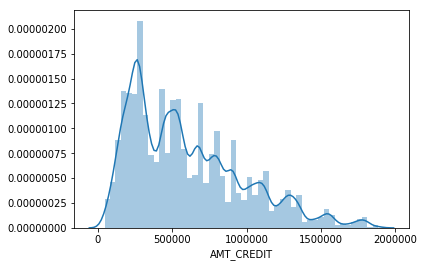

In [64]:
df_wo=Tg_0[Tg_0['Crd_Cat_Req']!='Outlier']
sns.distplot(df_wo['AMT_CREDIT'])

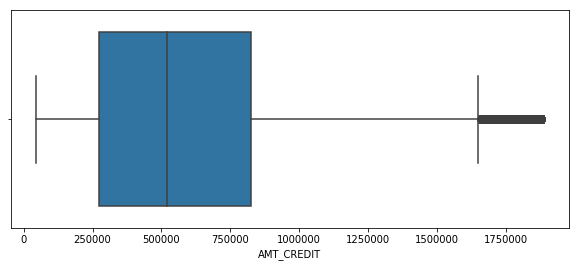

In [65]:
plt.figure(figsize=(10,4))
sns.boxplot('AMT_CREDIT',data=df_wo)

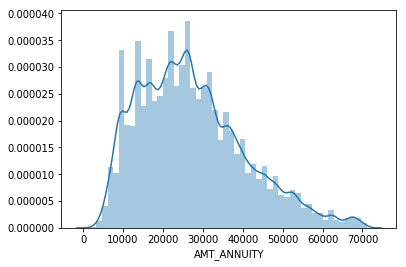

In [66]:
df_wo=Tg_0[Tg_0['Cat_ANNUITY']!='Outlier']
sns.distplot(df_wo['AMT_ANNUITY'])

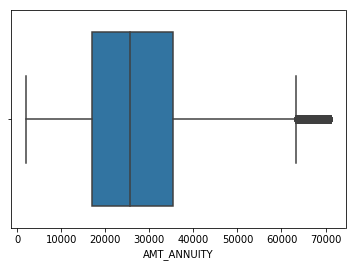

In [67]:
sns.boxplot('AMT_ANNUITY',data=df_wo)

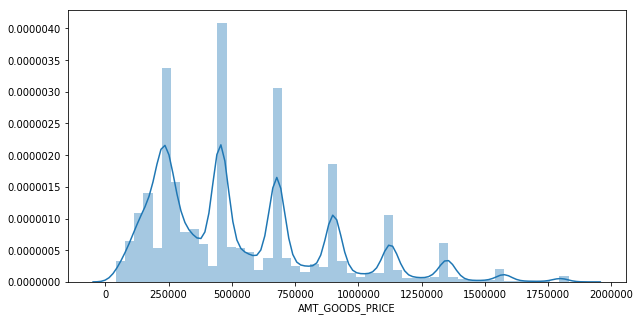

In [68]:
plt.figure(figsize=(10,5))
df_wo=df_wo=Tg_0[Tg_0['Crd_Cat_Req']!='Outlier']
df_wo=df_wo[~df_wo['AMT_GOODS_PRICE'].isna()]
sns.distplot(df_wo['AMT_GOODS_PRICE'])

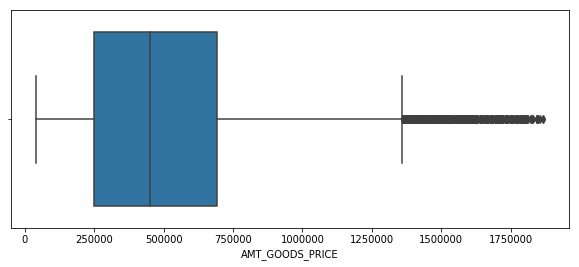

In [69]:
plt.figure(figsize=(10,4))
sns.boxplot('AMT_GOODS_PRICE',data=df_wo)

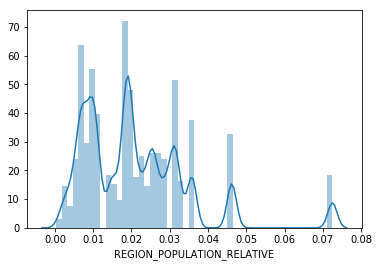

In [70]:
sns.distplot(df['REGION_POPULATION_RELATIVE'])

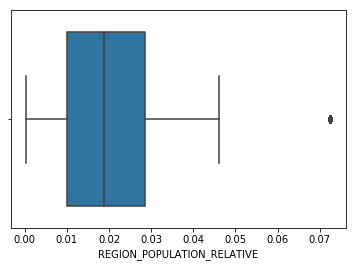

In [71]:
sns.boxplot('REGION_POPULATION_RELATIVE',data=df0_num)

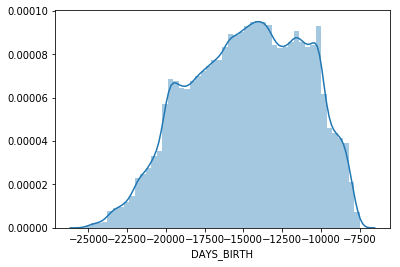

In [72]:
sns.distplot(df['DAYS_BIRTH'])

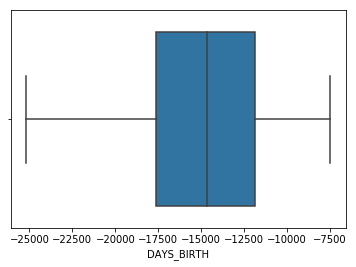

In [73]:
sns.boxplot('DAYS_BIRTH',data=df0_num)

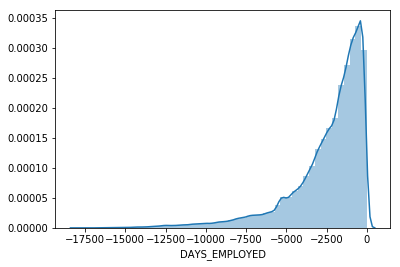

In [74]:
sns.distplot(df0_num['DAYS_EMPLOYED'])

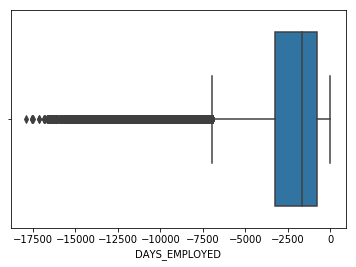

In [75]:
sns.boxplot('DAYS_EMPLOYED',data=df0_num)

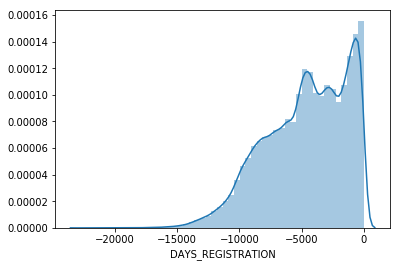

In [76]:
sns.distplot(df0_num['DAYS_REGISTRATION'])

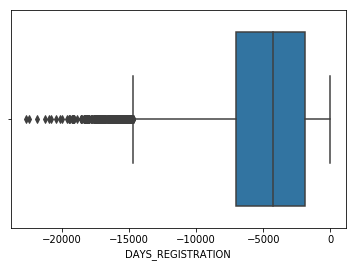

In [77]:
sns.boxplot('DAYS_REGISTRATION',data=df0_num)

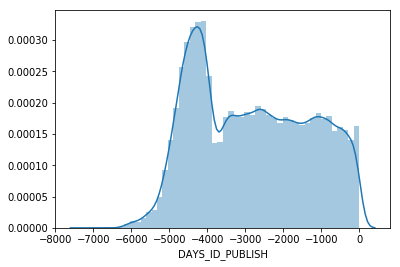

In [78]:
sns.distplot(df0_num['DAYS_ID_PUBLISH'])

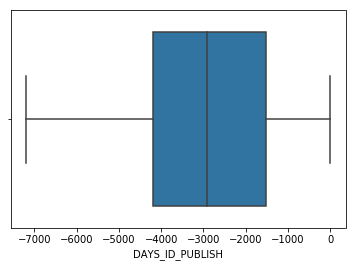

In [79]:
sns.boxplot('DAYS_ID_PUBLISH',data=df0_num)

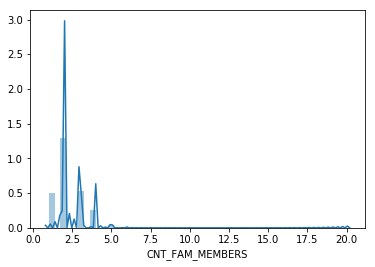

In [80]:
df0_num1=df0_num[~df0_num['CNT_FAM_MEMBERS'].isna()]
sns.distplot(df0_num1['CNT_FAM_MEMBERS'])

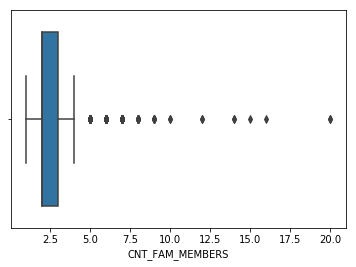

In [81]:
sns.boxplot('CNT_FAM_MEMBERS',data=df0_num1)

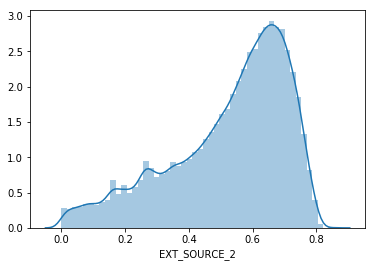

In [82]:
df0_num1=df0_num[~df0_num['EXT_SOURCE_2'].isna()]
sns.distplot(df0_num1['EXT_SOURCE_2'])

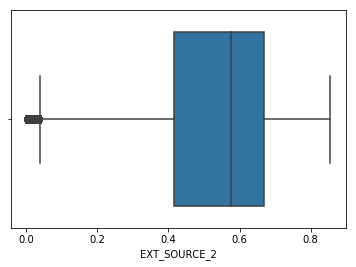

In [83]:
sns.boxplot('EXT_SOURCE_2',data=df0_num1)

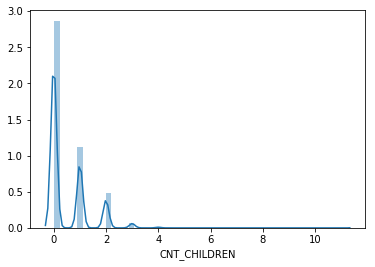

In [84]:
sns.distplot(df1_num['CNT_CHILDREN'])

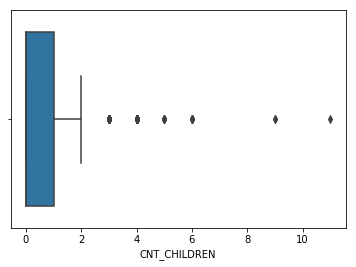

In [85]:
sns.boxplot('CNT_CHILDREN',data=df1_num)

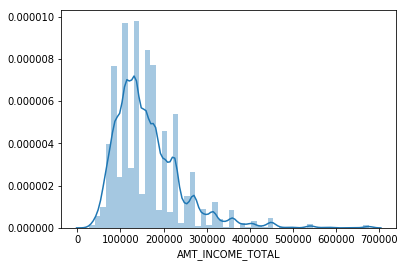

In [86]:
df_wo1=Tg_1[Tg_1['Income_cat']!='Outlier']
sns.distplot(df_wo1['AMT_INCOME_TOTAL'])

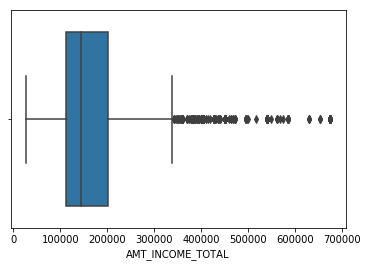

In [87]:
sns.boxplot('AMT_INCOME_TOTAL',data=df_wo1)

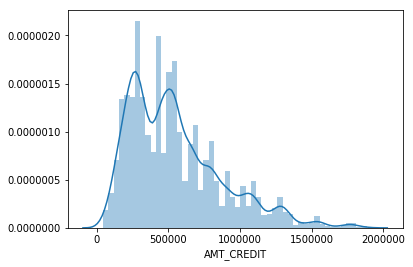

In [88]:
df_wo1=Tg_1[Tg_1['Crd_Cat_Req']!='Outlier']
sns.distplot(df_wo1['AMT_CREDIT'])

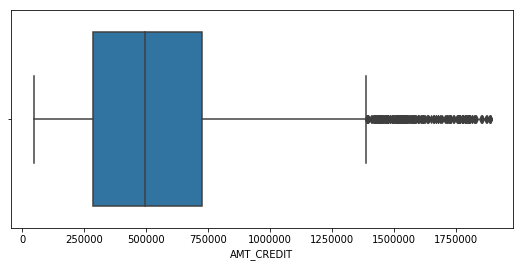

In [89]:
plt.figure(figsize=(9,4))
sns.boxplot('AMT_CREDIT',data=df_wo1)

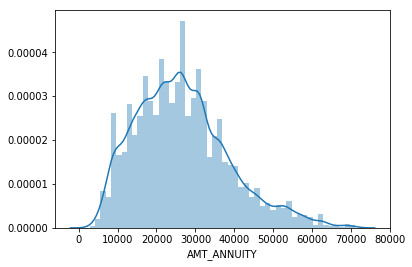

In [90]:
df_wo1=Tg_1[Tg_1['Cat_ANNUITY']!='Outlier']
df_wo1=df_wo1[~df_wo1['AMT_ANNUITY'].isna()]
sns.distplot(df_wo1['AMT_ANNUITY'])

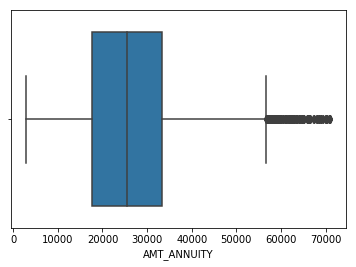

In [91]:
sns.boxplot('AMT_ANNUITY',data=df_wo1)

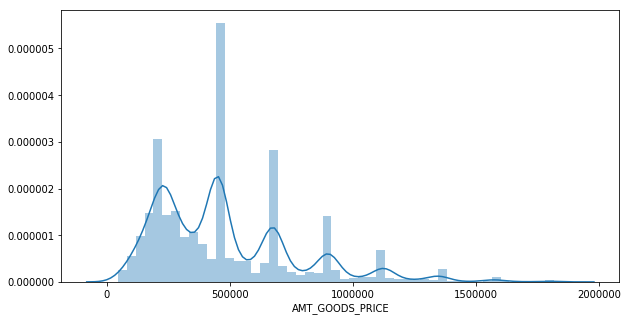

In [92]:
plt.figure(figsize=(10,5))
df_wo1=Tg_1[Tg_1['Crd_Cat_Req']!='Outlier']
df_wo1=df_wo1[~df_wo1['AMT_GOODS_PRICE'].isna()]
sns.distplot(df_wo1['AMT_GOODS_PRICE'])

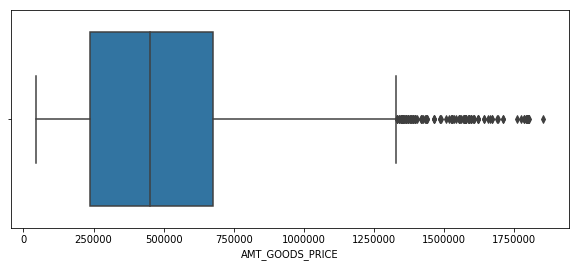

In [93]:
plt.figure(figsize=(10,4))
sns.boxplot('AMT_GOODS_PRICE',data=df_wo1)

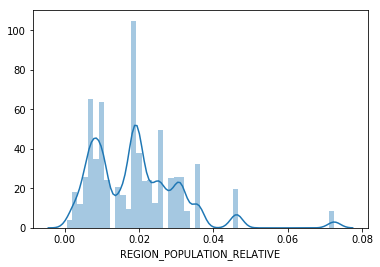

In [94]:
sns.distplot(df1_num['REGION_POPULATION_RELATIVE'])

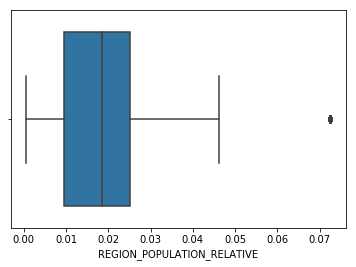

In [95]:
sns.boxplot('REGION_POPULATION_RELATIVE',data=df1_num)

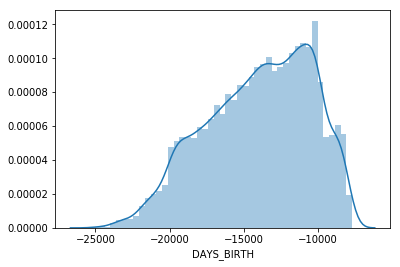

In [96]:
sns.distplot(df1_num['DAYS_BIRTH'])

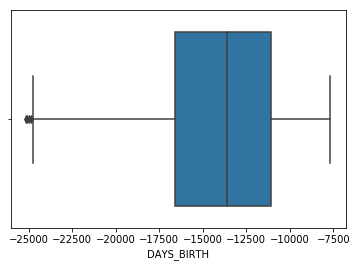

In [97]:
sns.boxplot('DAYS_BIRTH',data=df1_num)

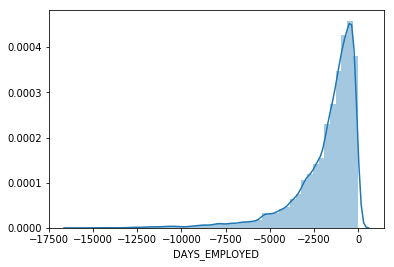

In [98]:
sns.distplot(df1_num['DAYS_EMPLOYED'])

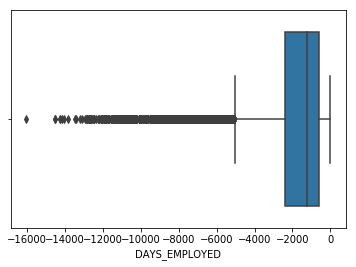

In [99]:
sns.boxplot('DAYS_EMPLOYED',data=df1_num)

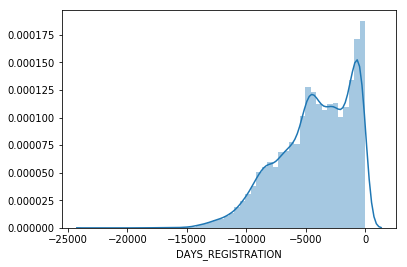

In [100]:
sns.distplot(df1_num['DAYS_REGISTRATION'])

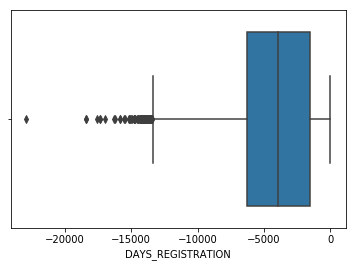

In [101]:
sns.boxplot('DAYS_REGISTRATION',data=df1_num)

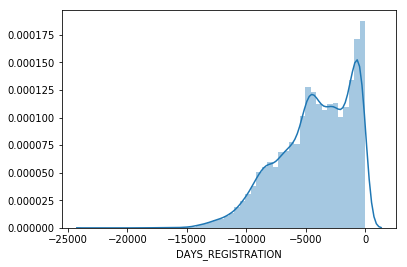

In [102]:
sns.distplot(df1_num['DAYS_REGISTRATION'])

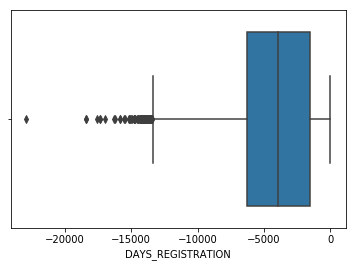

In [103]:
sns.boxplot('DAYS_REGISTRATION',data=df1_num)

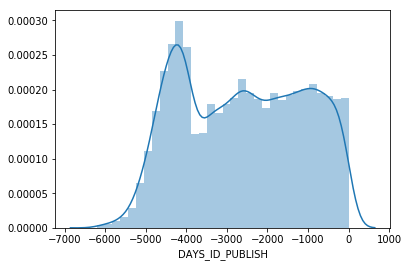

In [104]:
sns.distplot(df1_num['DAYS_ID_PUBLISH'])

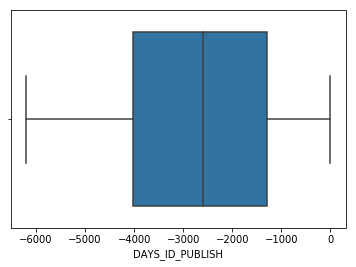

In [105]:
sns.boxplot('DAYS_ID_PUBLISH',data=df1_num)

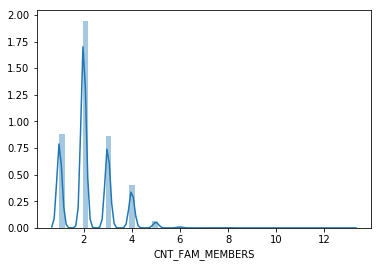

In [106]:
df1_num1=df1_num[~df1_num['CNT_FAM_MEMBERS'].isna()]
sns.distplot(df1_num1['CNT_FAM_MEMBERS'])

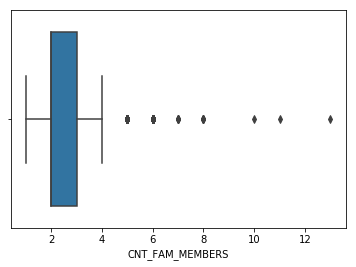

In [107]:
sns.boxplot('CNT_FAM_MEMBERS',data=df1_num1)

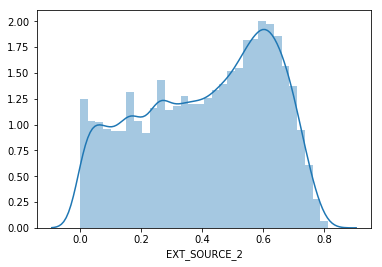

In [108]:
df1_num1=df1_num[~df1_num['EXT_SOURCE_2'].isna()]
sns.distplot(df1_num1['EXT_SOURCE_2'])

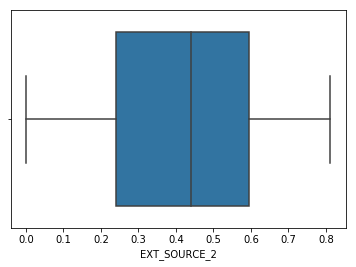

In [109]:
sns.boxplot('EXT_SOURCE_2',data=df1_num1)

<b>Bivariate Analysis<b>

In [110]:
# lets define a function to plot across categorical variables for tg_0
def plot_cat(varx,vary):
    sns.barplot(x=varx, y=vary, data=Tg_0,ci=False)
    plt.show()

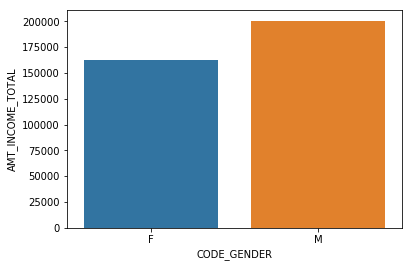

In [111]:
plot_cat('CODE_GENDER','AMT_INCOME_TOTAL')

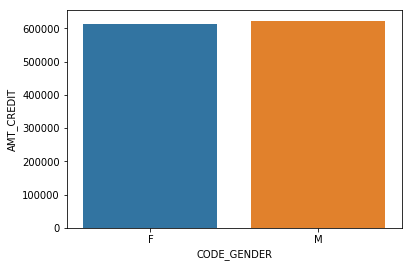

In [112]:
plot_cat('CODE_GENDER','AMT_CREDIT')

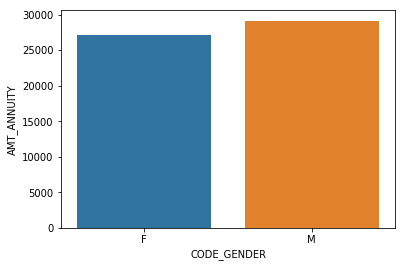

In [113]:
plot_cat('CODE_GENDER','AMT_ANNUITY')

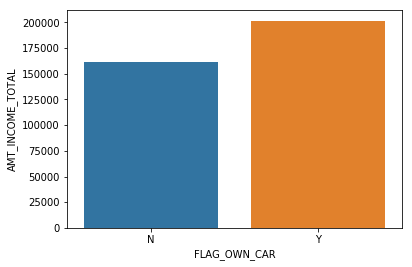

In [114]:
plot_cat('FLAG_OWN_CAR','AMT_INCOME_TOTAL')

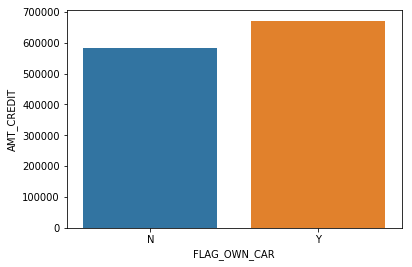

In [115]:
plot_cat('FLAG_OWN_CAR','AMT_CREDIT')

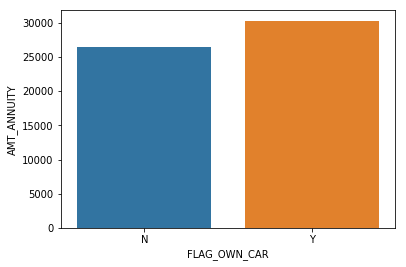

In [116]:
plot_cat('FLAG_OWN_CAR','AMT_ANNUITY')

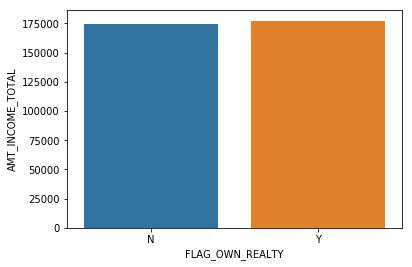

In [117]:
plot_cat('FLAG_OWN_REALTY','AMT_INCOME_TOTAL')

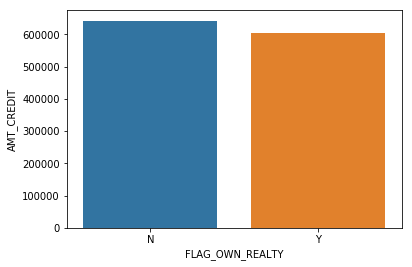

In [118]:
plot_cat('FLAG_OWN_REALTY','AMT_CREDIT')

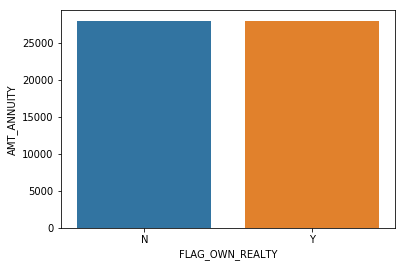

In [119]:
plot_cat('FLAG_OWN_REALTY','AMT_ANNUITY')

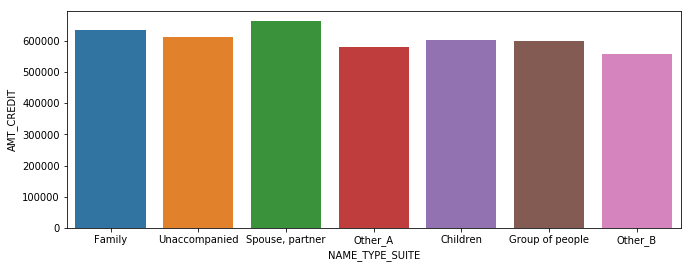

In [120]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_CREDIT')

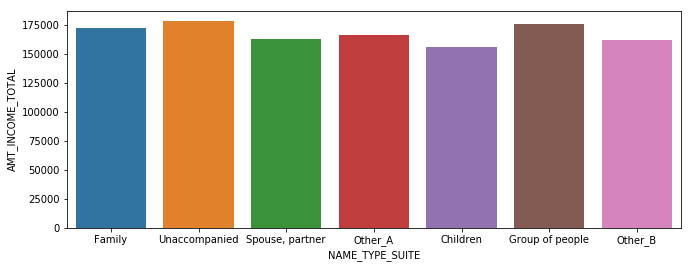

In [121]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_INCOME_TOTAL')

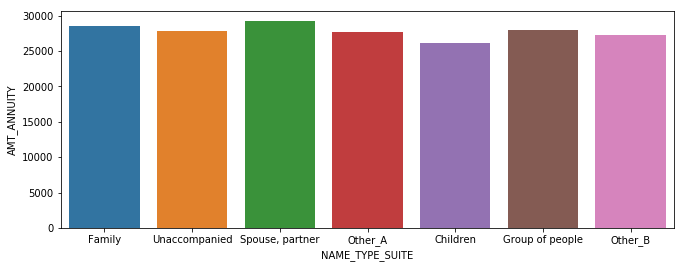

In [122]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_ANNUITY')

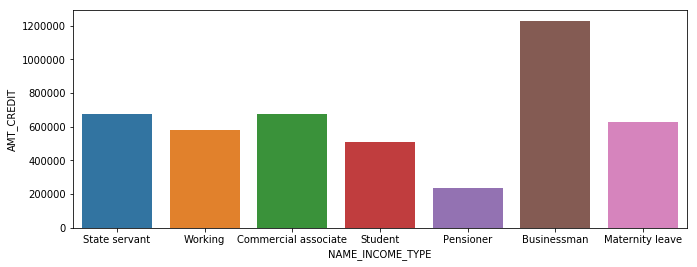

In [123]:
#NAME_INCOME_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_CREDIT')

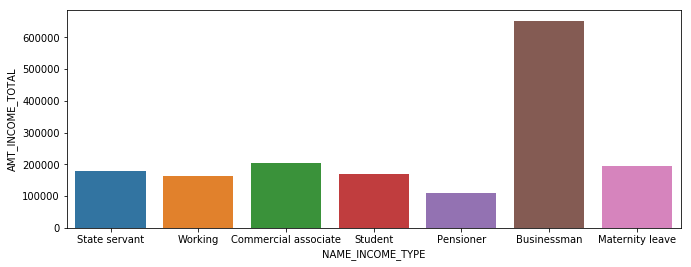

In [124]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

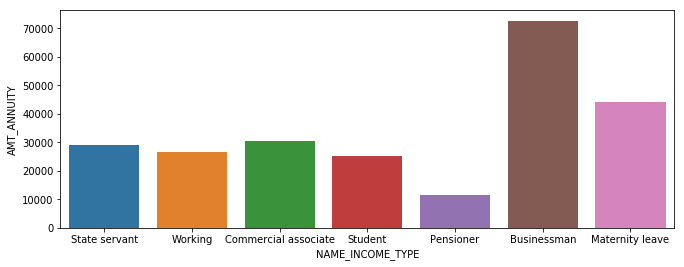

In [125]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_ANNUITY')

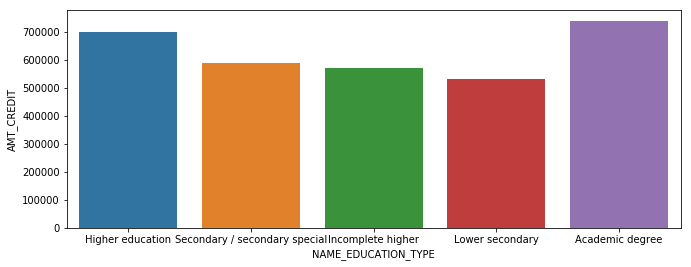

In [126]:
#NAME_EDUCATION_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_CREDIT')

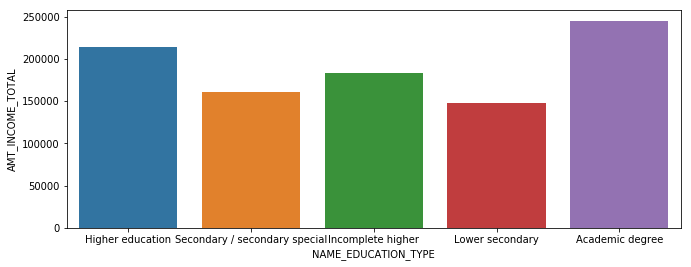

In [127]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

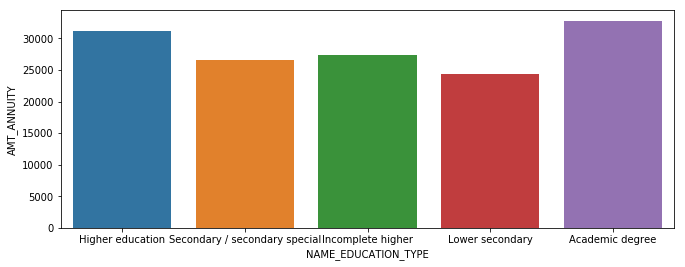

In [128]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_ANNUITY')

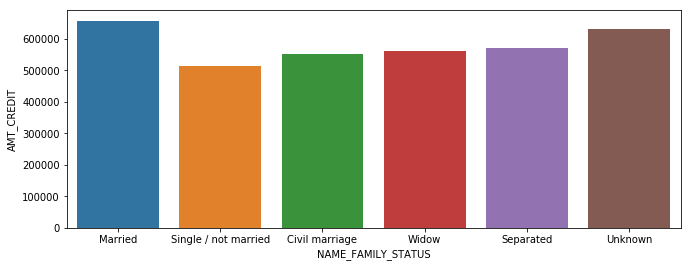

In [129]:
#NAME_FAMILY_STATUS 
plt.figure(figsize=(11,4))
plot_cat('NAME_FAMILY_STATUS','AMT_CREDIT')

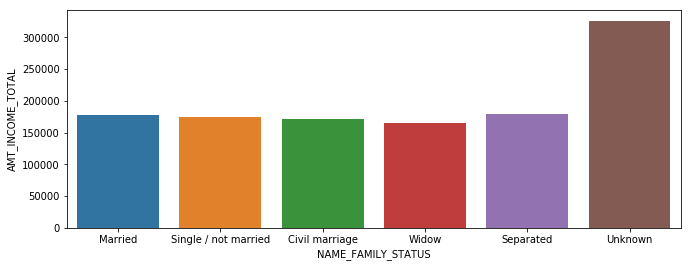

In [130]:
plt.figure(figsize=(11,4))
plot_cat('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL')

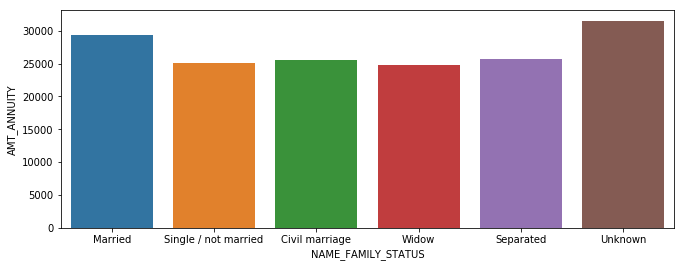

In [131]:
plt.figure(figsize=(11,4))
plot_cat('NAME_FAMILY_STATUS','AMT_ANNUITY')

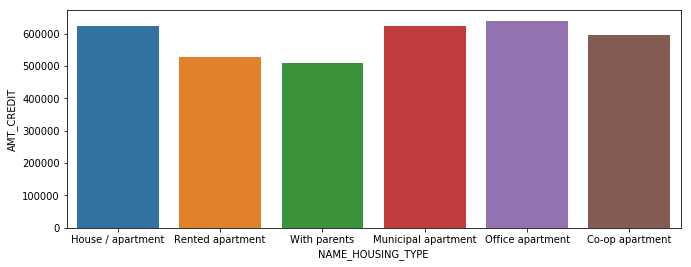

In [132]:
#NAME_HOUSING_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_CREDIT')

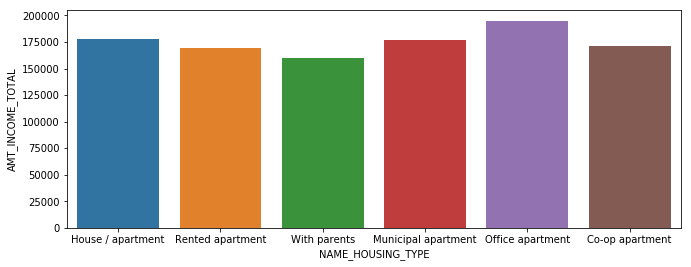

In [133]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL')

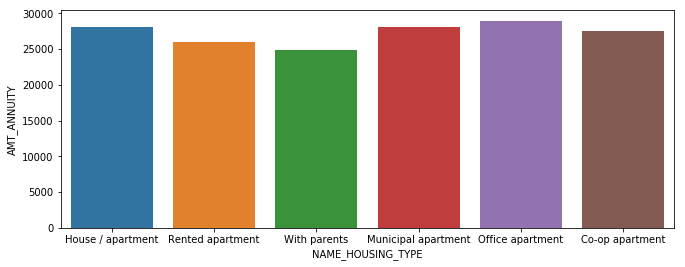

In [134]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_ANNUITY')

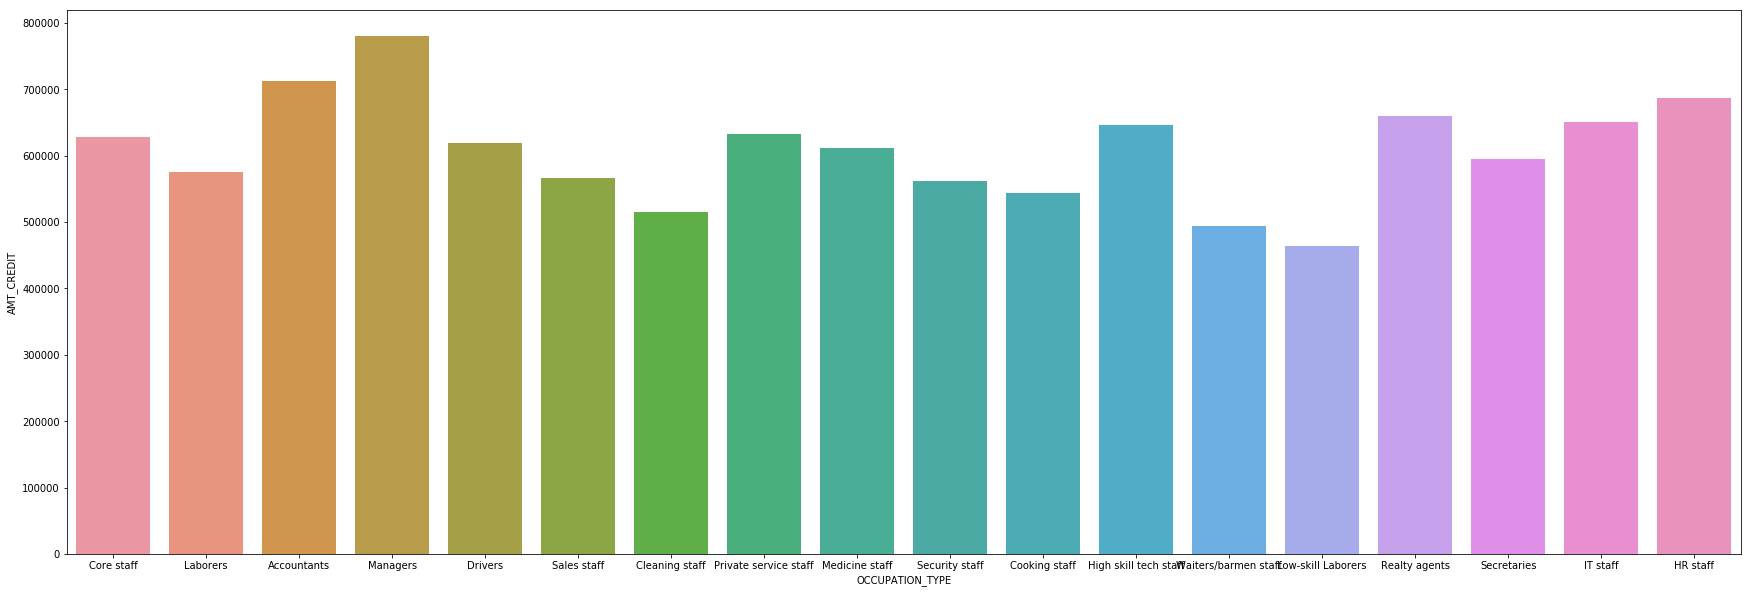

In [135]:
#OCCUPATION_TYPE 
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_CREDIT')

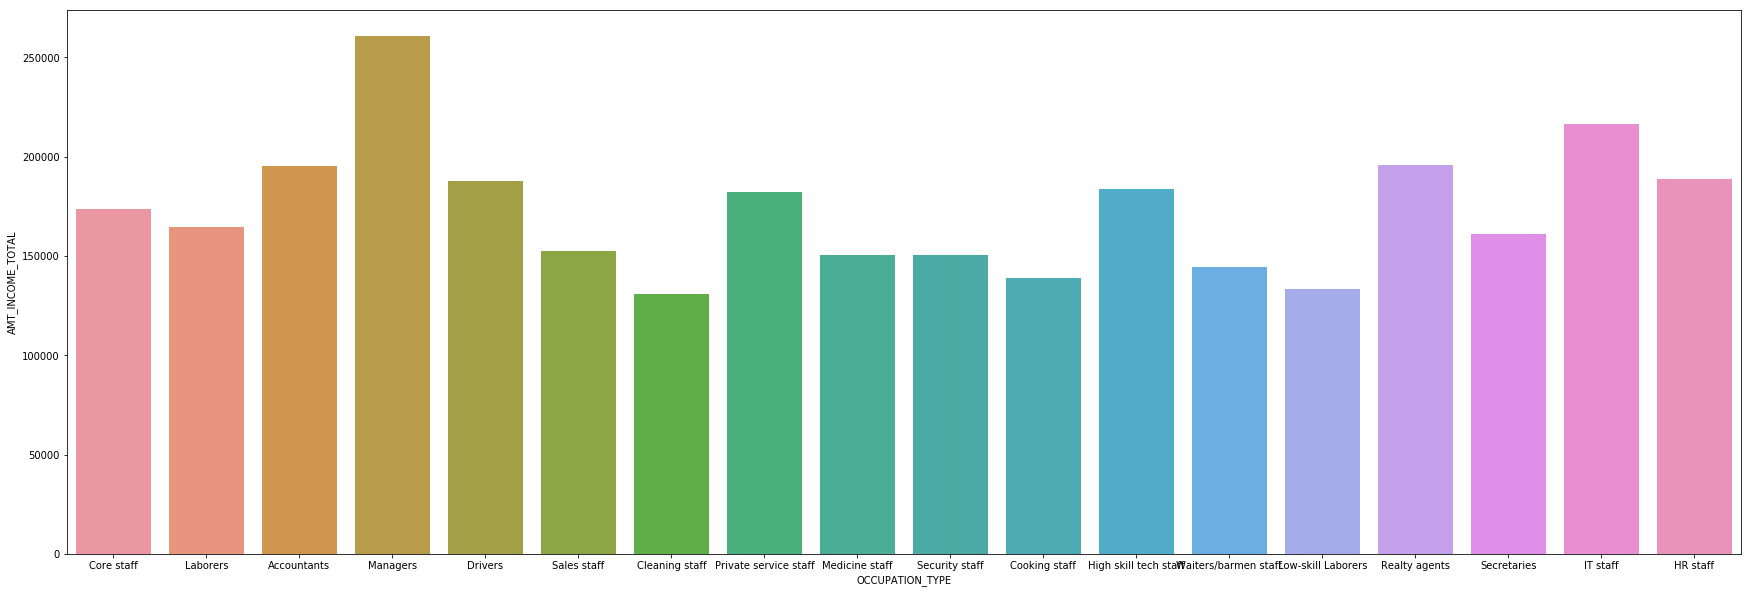

In [136]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_INCOME_TOTAL')

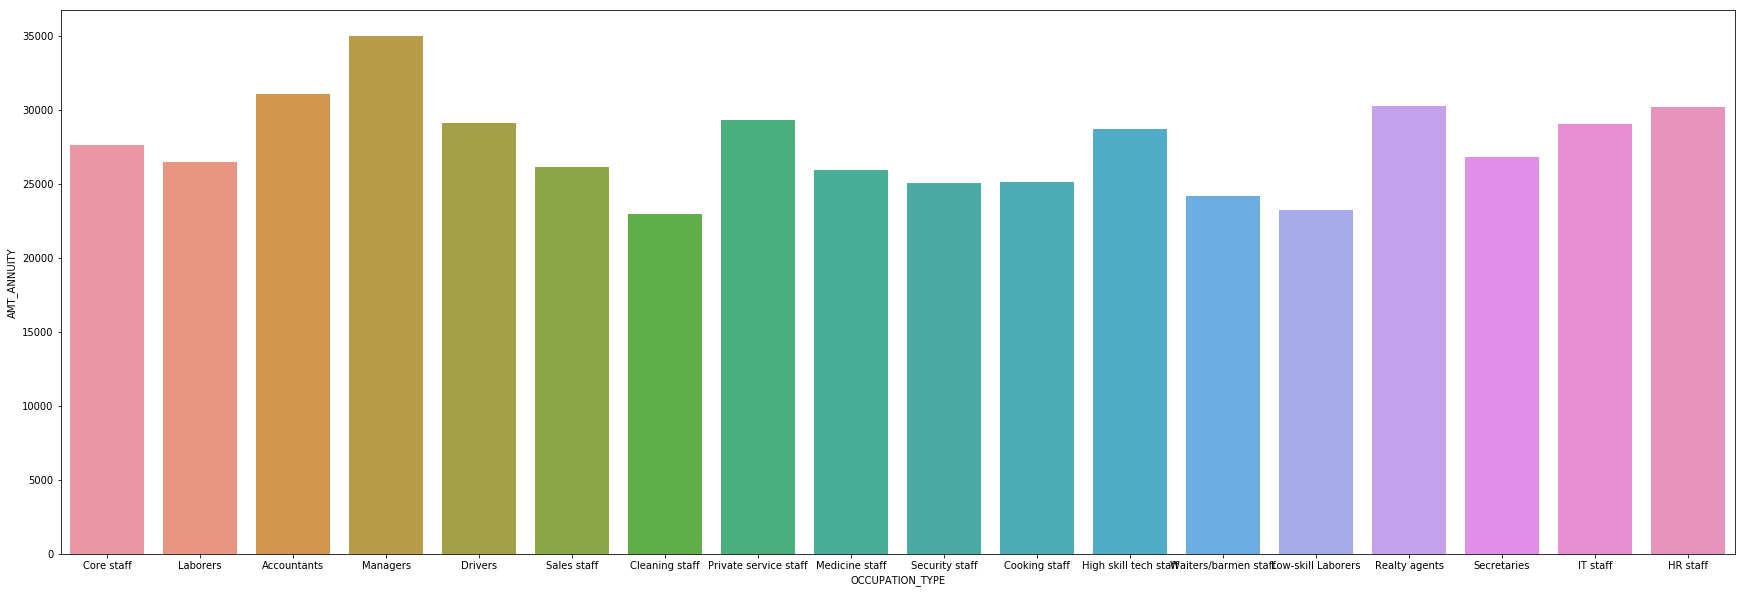

In [137]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_ANNUITY')

In [138]:
def plot_cat(varx,vary):
    sns.barplot(x=varx, y=vary, data=Tg_1,ci=False)
    plt.show()

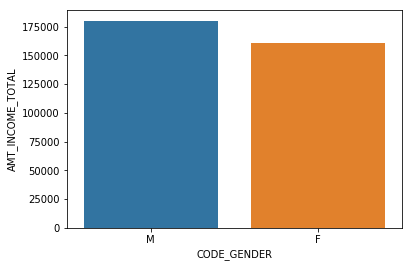

In [139]:
plot_cat('CODE_GENDER','AMT_INCOME_TOTAL')

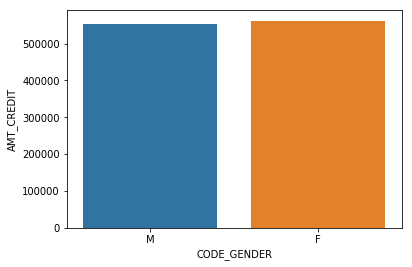

In [140]:
plot_cat('CODE_GENDER','AMT_CREDIT')

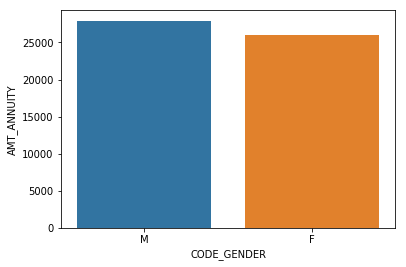

In [141]:
plot_cat('CODE_GENDER','AMT_ANNUITY')

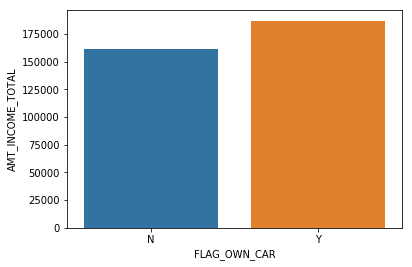

In [142]:
plot_cat('FLAG_OWN_CAR','AMT_INCOME_TOTAL')

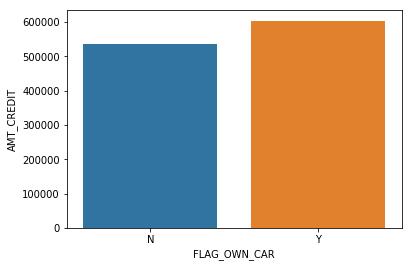

In [143]:
plot_cat('FLAG_OWN_CAR','AMT_CREDIT')

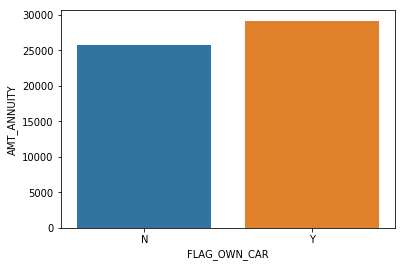

In [144]:
plot_cat('FLAG_OWN_CAR','AMT_ANNUITY')

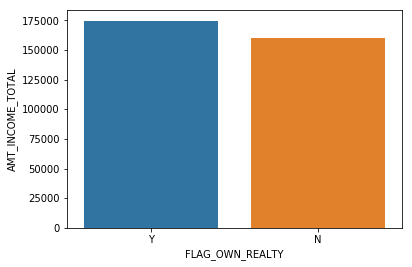

In [145]:
plot_cat('FLAG_OWN_REALTY','AMT_INCOME_TOTAL')

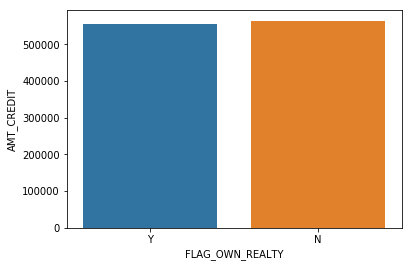

In [146]:
plot_cat('FLAG_OWN_REALTY','AMT_CREDIT')

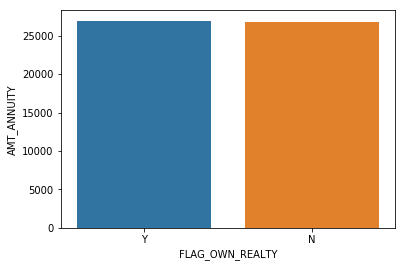

In [147]:
plot_cat('FLAG_OWN_REALTY','AMT_ANNUITY')

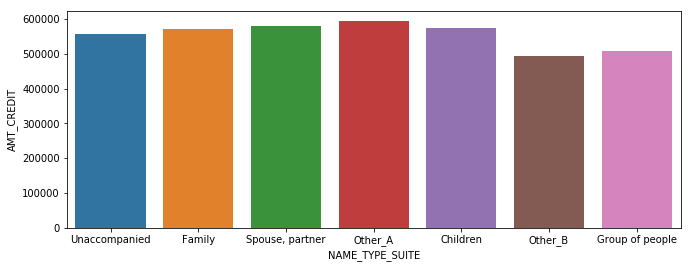

In [148]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_CREDIT')

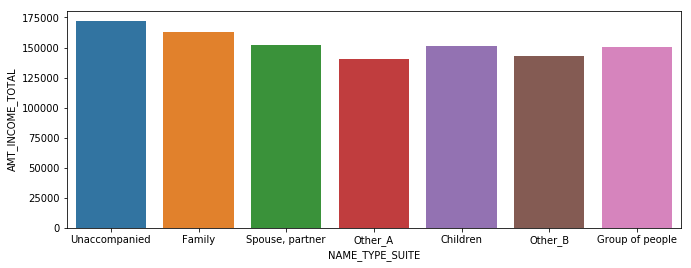

In [149]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_INCOME_TOTAL')

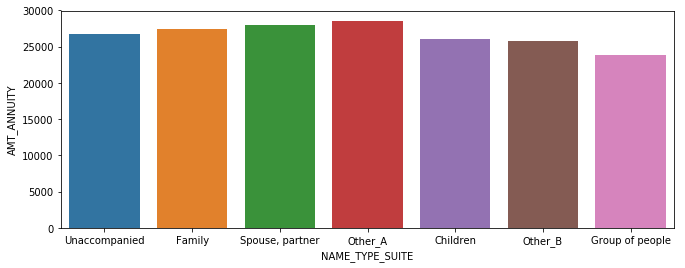

In [150]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_ANNUITY')

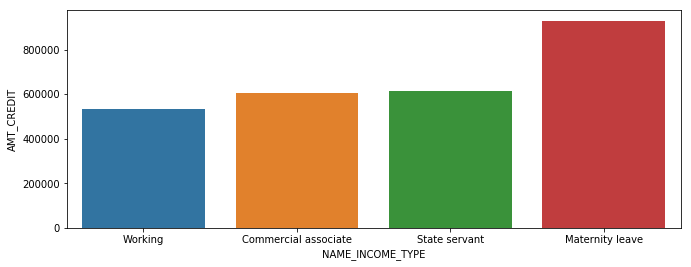

In [151]:
#NAME_INCOME_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_CREDIT')

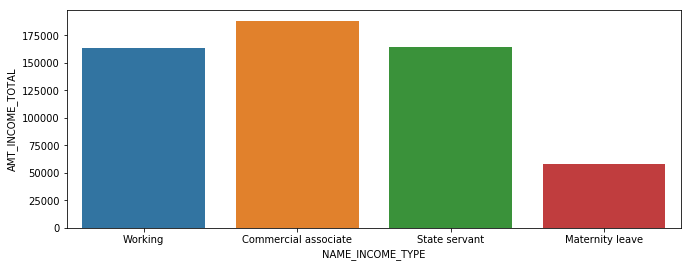

In [152]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

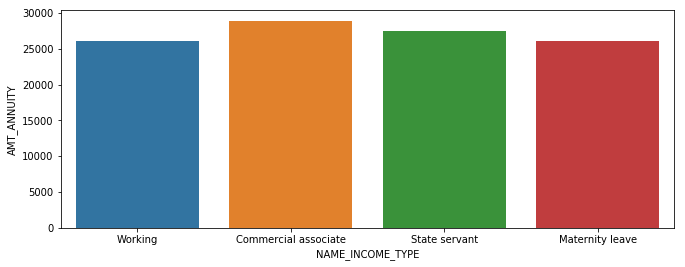

In [153]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_ANNUITY')

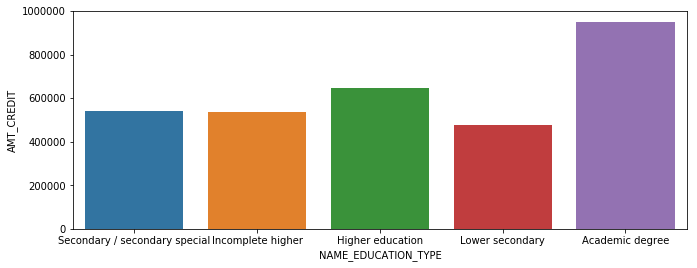

In [154]:
#NAME_EDUCATION_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_CREDIT')

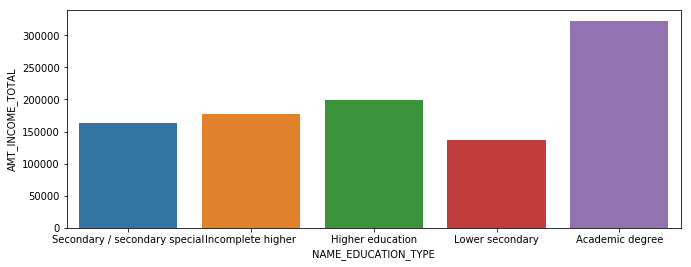

In [155]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

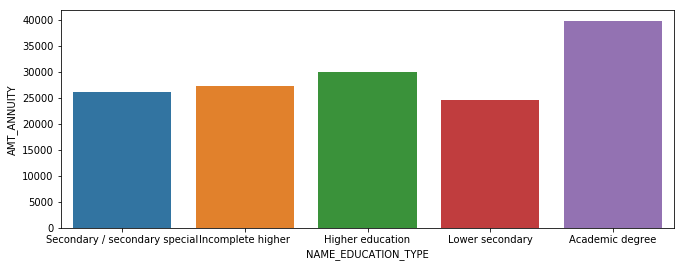

In [156]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_ANNUITY')

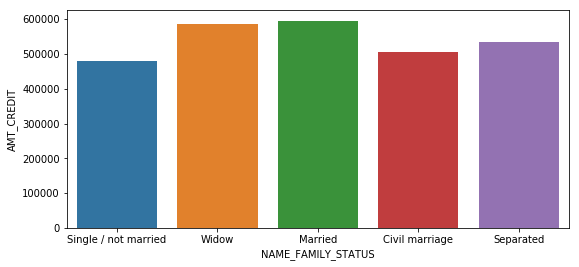

In [157]:
#NAME_FAMILY_STATUS 
plt.figure(figsize=(9,4))
plot_cat('NAME_FAMILY_STATUS','AMT_CREDIT')

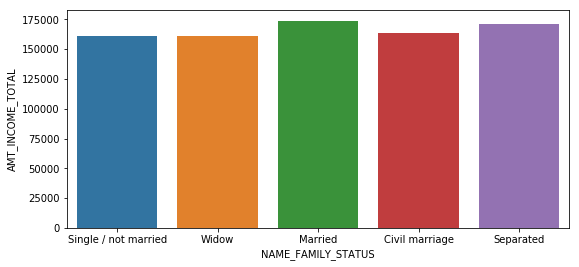

In [158]:
plt.figure(figsize=(9,4))
plot_cat('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL')

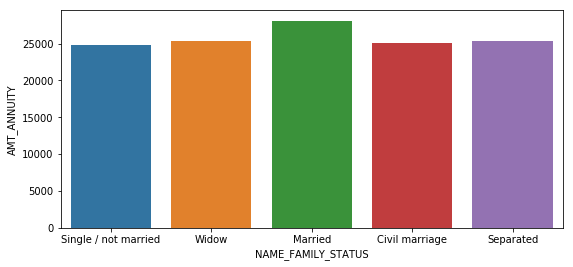

In [159]:
plt.figure(figsize=(9,4))
plot_cat('NAME_FAMILY_STATUS','AMT_ANNUITY')

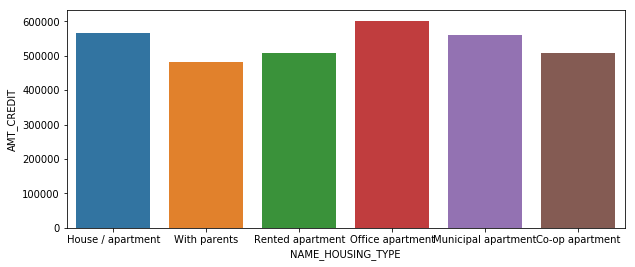

In [160]:
#NAME_HOUSING_TYPE
plt.figure(figsize=(10,4))
plot_cat('NAME_HOUSING_TYPE','AMT_CREDIT')

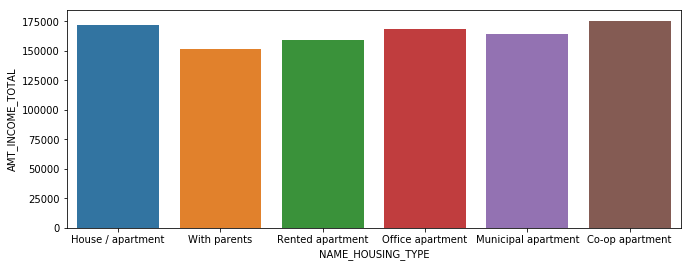

In [161]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL')

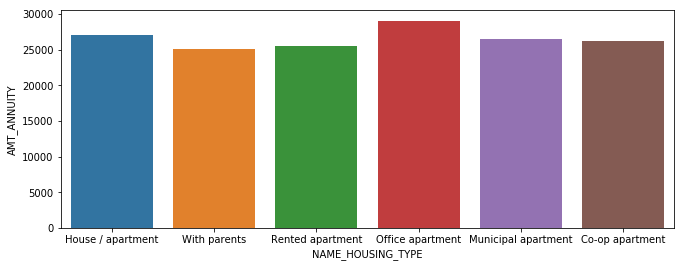

In [162]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_ANNUITY')

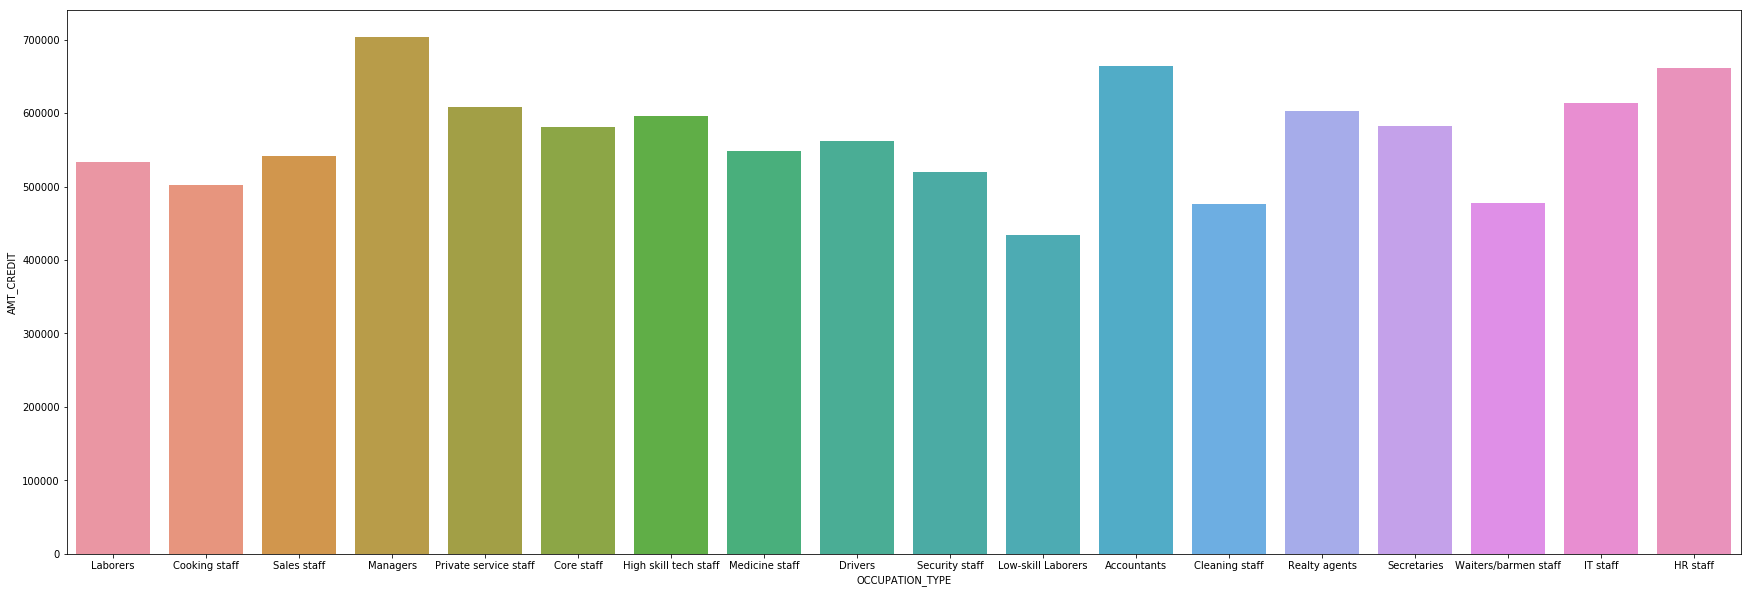

In [163]:
#OCCUPATION_TYPE 
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_CREDIT')

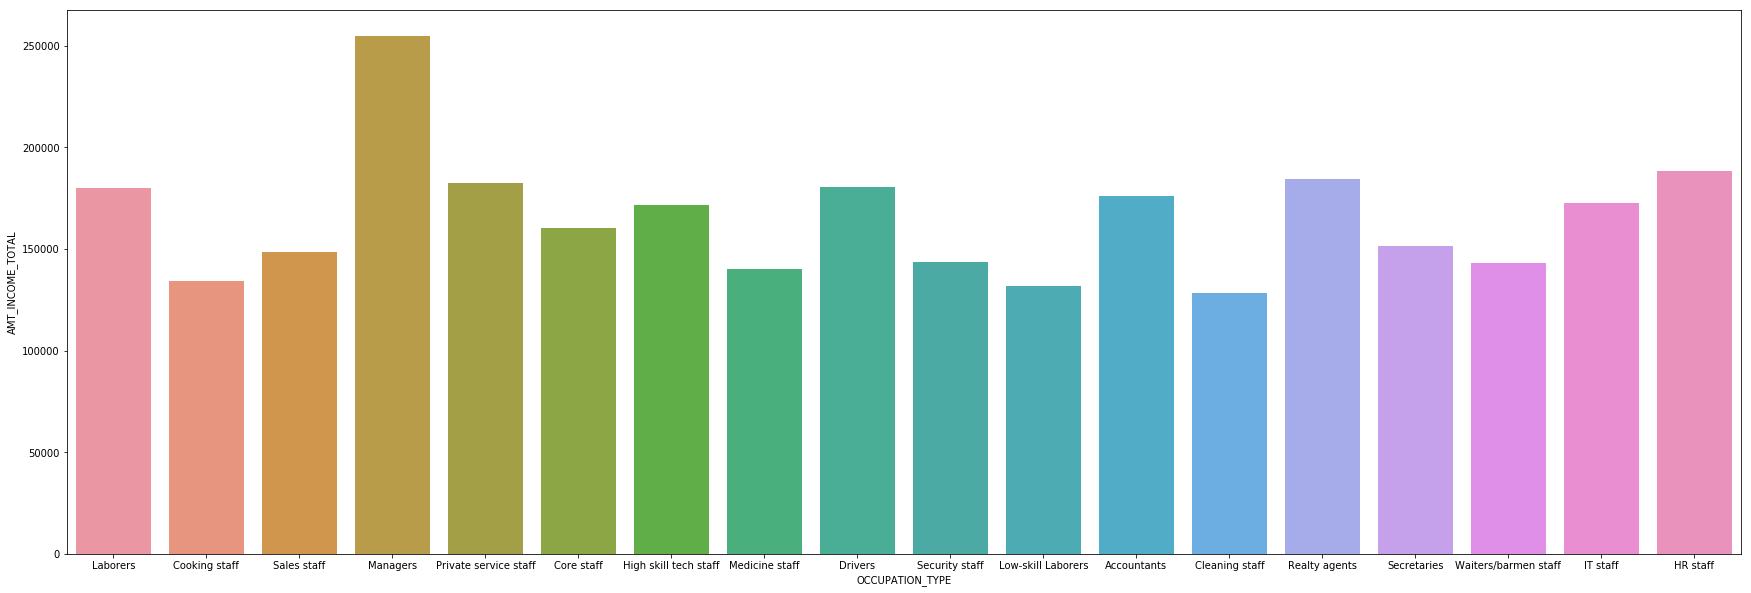

In [164]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_INCOME_TOTAL')

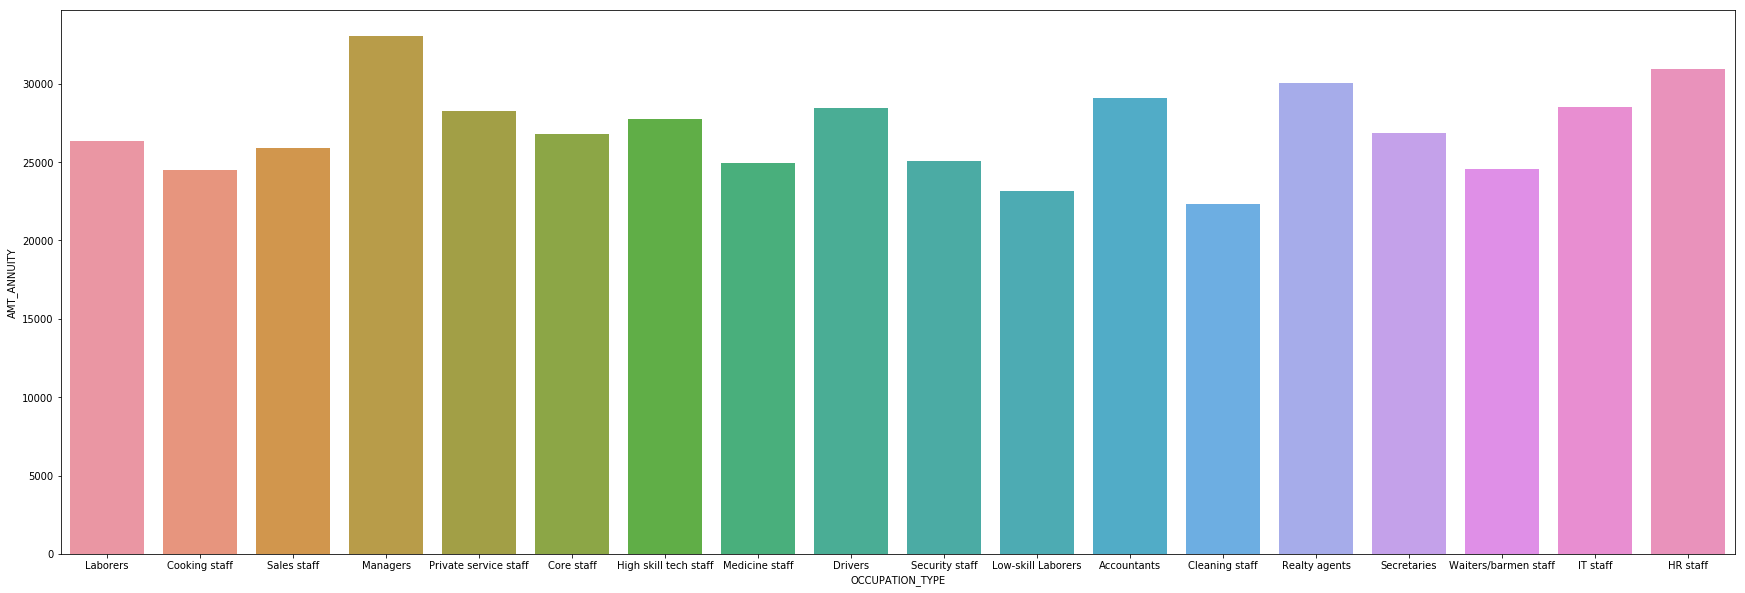

In [165]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_ANNUITY')

In [166]:
Tg_1.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'Crd_Cat_Req', 'Income_cat', 'Cat_ANNUITY'],
      dtype='object')

<b>BIVARIATE ANALYSIS OF CONTINOUS VARIABLE<b>

In [167]:
def plot_cont(varx,vary,d):
    plt.figure(figsize=(10,10))
    sns.lmplot(x=varx, y=vary,data=d) 

In [168]:
#Removing the outlier to avoid the skewness
tg0_new=Tg_0[(Tg_0['Crd_Cat_Req']!='Outlier') & (Tg_0['Income_cat']!='Outlier') & (Tg_0['Cat_ANNUITY']!='Outlier')]
tg1_new=Tg_1[(Tg_1['Crd_Cat_Req']!='Outlier') & (Tg_1['Income_cat']!='Outlier') & (Tg_1['Cat_ANNUITY']!='Outlier')]

<Figure size 720x720 with 0 Axes>

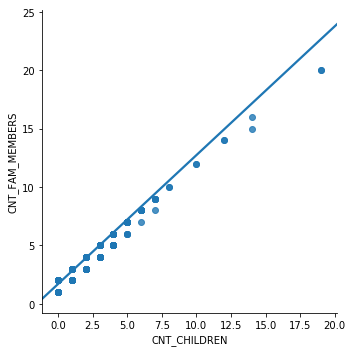

In [169]:
plot_cont('CNT_CHILDREN','CNT_FAM_MEMBERS',tg0_new)

<Figure size 720x720 with 0 Axes>

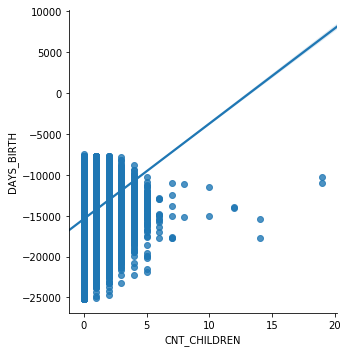

In [170]:
plot_cont('CNT_CHILDREN','DAYS_BIRTH',tg0_new)

<Figure size 720x720 with 0 Axes>

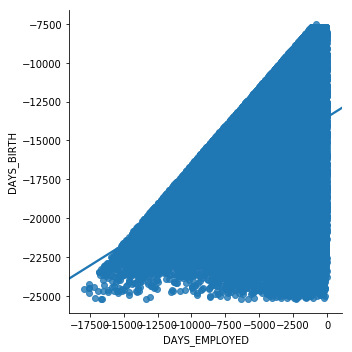

In [171]:
plot_cont('DAYS_EMPLOYED','DAYS_BIRTH',tg0_new)

<Figure size 720x720 with 0 Axes>

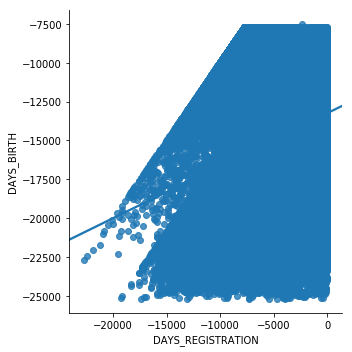

In [172]:
plot_cont('DAYS_REGISTRATION','DAYS_BIRTH',tg0_new)

<Figure size 720x720 with 0 Axes>

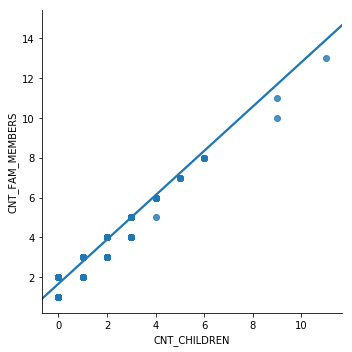

In [173]:
plot_cont('CNT_CHILDREN','CNT_FAM_MEMBERS',tg1_new)

<Figure size 720x720 with 0 Axes>

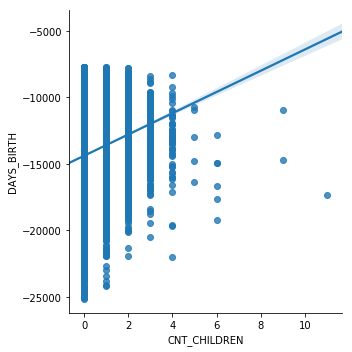

In [174]:
plot_cont('CNT_CHILDREN','DAYS_BIRTH',tg1_new)

<Figure size 720x720 with 0 Axes>

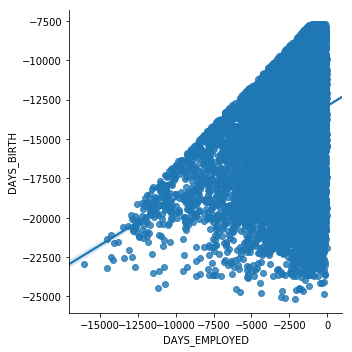

In [175]:
plot_cont('DAYS_EMPLOYED','DAYS_BIRTH',tg1_new)

<Figure size 720x720 with 0 Axes>

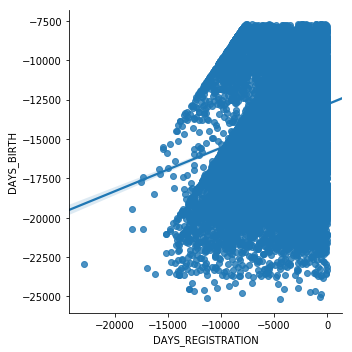

In [176]:
plot_cont('DAYS_REGISTRATION','DAYS_BIRTH',tg1_new)

In [177]:
df_new=pd.read_csv('Previous_Application.csv')
df_new

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_prv=df_new.loc[:,['SK_ID_CURR','NAME_CONTRACT_STATUS']]

In [179]:
df1=pd.merge(Tg_1,df_prv,on='SK_ID_CURR',how='inner')
df1

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat,Cat_ANNUITY,NAME_CONTRACT_STATUS
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949,Medium,High,Medium,Approved
1,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,Very_High,High,High,Approved
2,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,Very_High,High,High,Approved
3,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,Very_High,High,High,Refused
4,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,Very_High,High,High,Approved
5,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,Very_High,High,High,Approved
6,100047,1,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,Business Entity Type 3,0.306841,Very_High,High,High,Refused
7,100049,1,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,Sales staff,2.0,3,3,Self-employed,0.674203,Medium,Medium,Low,Approved
8,100049,1,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,Sales staff,2.0,3,3,Self-employed,0.674203,Medium,Medium,Low,Approved
9,100049,1,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,Sales staff,2.0,3,3,Self-employed,0.674203,Medium,Medium,Low,Approved


In [180]:
df0=pd.merge(Tg_0,df_prv,on='SK_ID_CURR',how='inner')
df0

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat,Cat_ANNUITY,NAME_CONTRACT_STATUS
0,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246,Very_High,Very_High,Very_High,Approved
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246,Very_High,Very_High,Very_High,Approved
2,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246,Very_High,Very_High,Very_High,Approved
3,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government,0.555912,Low,Low,Low,Approved
4,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High,Approved
5,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High,Canceled
6,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High,Approved
7,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High,Approved
8,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High,Approved
9,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium,High,Canceled


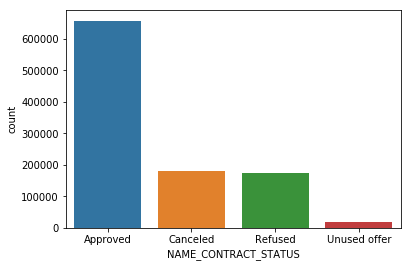

In [181]:
plot_ct('NAME_CONTRACT_STATUS',df0)

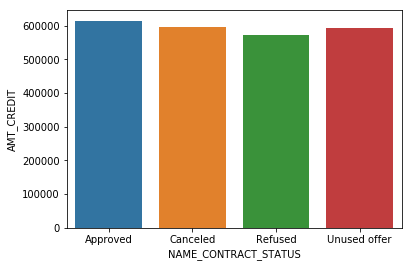

In [182]:
sns.barplot('NAME_CONTRACT_STATUS','AMT_CREDIT',data=df0,ci=False)

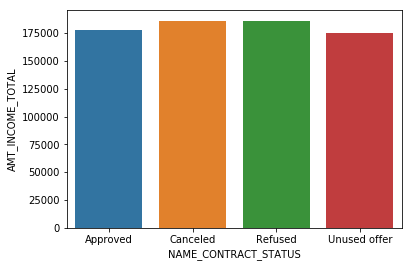

In [183]:
sns.barplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL',data=df0,ci=False)

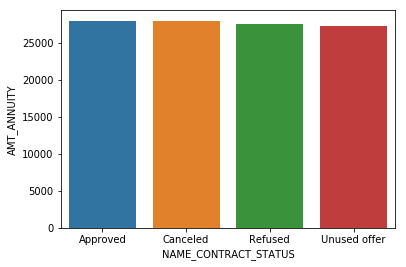

In [184]:
sns.barplot('NAME_CONTRACT_STATUS','AMT_ANNUITY',data=df0,ci=False)

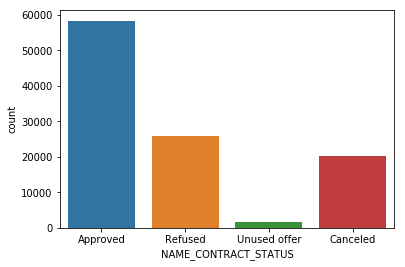

In [185]:
plot_ct('NAME_CONTRACT_STATUS',df1)

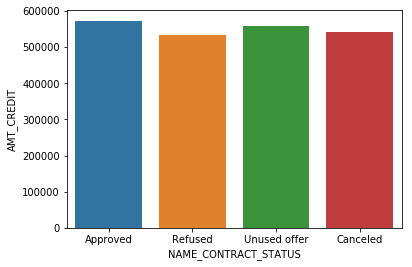

In [186]:
sns.barplot('NAME_CONTRACT_STATUS','AMT_CREDIT',data=df1,ci=False)

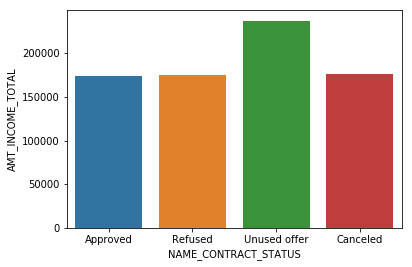

In [187]:
sns.barplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL',data=df1,ci=False)

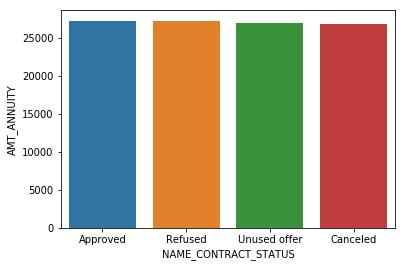

In [188]:
sns.barplot('NAME_CONTRACT_STATUS','AMT_ANNUITY',data=df1,ci=False)